# Práctica 2

## Vanessa Rodríguez Horcajo y José Antonio Martínez Martínez.

## Imports generales

### Instalaciones

In [ ]:
!pip install cdlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.3/230.3 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 30.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.4/169.4 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 32.0 MB/s eta 0:00:00


In [ ]:
!pip install igraph

In [ ]:
!pip install leidenalg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 22.1 MB/s eta 0:00:00
  Attempting uninstall: igraph
    Found existing installation: igraph 0.11.3
    Uninstalling igraph-0.11.3:
      Successfully uninstalled igraph-0.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
python-igraph 0.11.3 requires igraph==0.11.3, but you have igraph 0.10.8 which is incompatible.


In [ ]:
!pip install pyvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 14.9 MB/s eta 0:00:00


In [ ]:
!pip install pymoo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.1/249.1 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 17.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for grapheme: filename=grapheme-0.6.0-py3-none-any.whl size=210078 sha256=4a06203358d7e66e248cfc30eb7f9ed567a3b3c4ea6f0c205d67acba0e95b43a
  Stored in directory: /root/.cache/pip/wheels/01/e1/49/37e6bde9886439057450c494a79b0bef8bbe897a54aebfc757
Successfully built grapheme


In [ ]:
!pip install pymoo

### Imports

In [ ]:
import networkx as nx
import numpy as np
import pandas as pd
from statistics import mode, median, mean
import random
import copy
import pickle
from cdlib import algorithms
from cdlib import evaluation
from pymoo.indicators.hv import HV
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as patches
import pandas as pd
from pyvis.network import Network
from google.colab import drive

Note: to be able to use all crisp methods, you need to install some additional packages:  {'bayanpy', 'infomap', 'wurlitzer', 'graph_tool'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'pyclustering', 'ASLPAw'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'infomap', 'wurlitzer'}


## Funciones generales de visualización

En esta sección hay diversas funciones cuyo objetivo es permitir la visualización, de maneras diversas y agradables, de elementos de la práctica tales como frentes de pareto y grafos.

In [ ]:
colormap = plt.cm.tab20

def str_color(r,g,b,a):
    return "#" + format(int(r*255), f'0{2}x') + format(int(g*255), f'0{2}x') + format(int(b*255), f'0{2}x') + format(int(a*255), f'0{2}x')

def assign_colors(values):
    colors = [str_color(*colormap(v)) for v in values]
    return colors

def draw_communities(coms, ax=None, with_labels=True):
    colors = assign_colors([coms[n] for n in G.nodes()])
    nx.draw(G, with_labels=with_labels, ax=ax, node_color=colors)
    ax.set_title(f"Q:{nx.community.modularity(G, to_communities_list(coms)):.4f}")

def to_communities_list(coms):
    c_pos = {v:i for i,v in enumerate(set(coms.values()))}

    num_c = len(c_pos)
    com_list = [[] for _ in range(num_c)]

    for k,v in coms.items():
        com_list[c_pos[v]].append(k)

    return com_list

def to_communities_dict(coms):
    inv_map = {}
    for k, v in coms.items():
        inv_map[v] = inv_map.get(v, []) + [k]

    return inv_map

In [ ]:
def draw_with_communities(G, communities, with_labels=True):
    # Asignación del id de la comunidad de cada nodo como un atributo
    attributes = {}
    for cid, nodes in enumerate(communities):
        for nid in nodes:
            attributes[nid] = {"community": cid}
    nx.set_node_attributes(G, attributes)

    # Creación de un diccionario de distancias, los nodos en la misma comunidad tienen distancias más cortas,
    # los nodos en diferentes comunidades, distancias más largas
    distances = {}
    for node1 in G.nodes:
        distances[node1] = {}
        for node2 in G.nodes:
            if G.nodes[node1]['community'] == G.nodes[node2]['community']:
                distances[node1][node2] = 3
            else:
                distances[node1][node2] = 10

    # Dibujado del gráfo con las comunidades. El color de cada nodo es su atributo comunidad
    pos = nx.kamada_kawai_layout(G, dist=distances)
    nx.draw_networkx(G, with_labels=with_labels, node_size=30, font_size=7, node_color=[G.nodes[node]['community'] for node in G.nodes], edge_color="#CCC", pos=pos, cmap=plt.cm.tab20)

In [ ]:
def calculate_edge_weight(nodes_1, nodes_2):
    weight = 0
    for node_1 in nodes_1:
        for node_2 in nodes_2:
            if G.has_edge(node_1, node_2):
                weight += 1 # Asumimos peso 1 en las aristas
    return weight

In [ ]:
def draw_kamada(G):
  # Colapsar el gráfo en comunidades
  G_coms = nx.quotient_graph(
        G,
        partition=lambda x,y: G.nodes[x]['community'] == G.nodes[y]['community'],
        edge_data=lambda sx, sy: {"weight": calculate_edge_weight(sx, sy)},
        node_data=lambda n: {"community": G.nodes[list(n)[0]]['community'], "size": len(n)},
        relabel=True)

  # Normalizado del peso de las aristas
  max_weight = max([G_coms.edges[e]["weight"] for e in G_coms.edges])
  min_weight = min([G_coms.edges[e]["weight"] for e in G_coms.edges])
  for e in G_coms.edges:
      G_coms.edges[e]["weight"] = (G_coms.edges[e]["weight"] - min_weight) / (max_weight - min_weight)

  fig ,ax = plt.subplots(1,figsize=(10, 10))

  nx.draw_kamada_kawai(
      G_coms,
      with_labels=True,
      node_size=[G_coms.nodes[node]['size'] * 10 for node in G_coms.nodes],
      edge_color=[G_coms.edges[e]["weight"] for e in G_coms.edges],
      node_color=[G_coms.nodes[node]['community'] for node in G_coms.nodes],
      edge_cmap=plt.cm.Blues,
      cmap=plt.cm.tab20)

  ax.set_facecolor('lightgray')
  ax.axis('off')
  fig.set_facecolor('lightgray')
  plt.show()

Función auxiliar `plot_frente_pareto`: Función que dibuja el frente de pareto que se le pase.

Parámetros:
- `frente_pareto`: El frente de pareto a dibujar.

In [ ]:
def plot_frente_pareto(frente_pareto):

  x_values = [fitness[0] for fitness in frente_pareto]
  y_values = [fitness[1] for fitness in frente_pareto]

  plt.scatter(x_values, y_values, label='Soluciones', color='blue', s=100)

  plt.xlabel('Community Score')
  plt.ylabel('Internal Density')
  plt.title('Frente de Pareto')
  plt.legend()

  # Mostrar el gráfico
  plt.show()

Ejemplo sencillo:

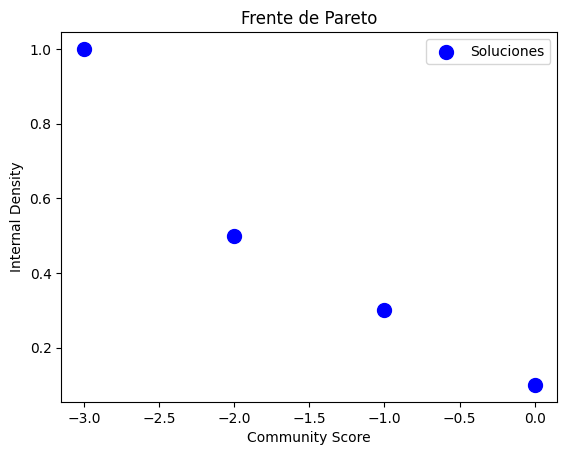

In [ ]:
pareto = [(0, 0.1), (-1, 0.3), (-2, 0.5), (-3, 1)]
plot_frente_pareto(pareto)

## Carga y análisis del grafo

***Nota:*** Los datos han sido almacenados en google drive por comodidad. Para la ejecución de este notebook se necesita alterar las dos siguientes lineas para que los datos se carguen desde donde esten almacenados. En nuestro caso, montando el drive a la sesión de google colab.

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
G = nx.read_graphml("./drive/MyDrive/CosasSerias/Universidad/Master/amazon_graph.graphml")

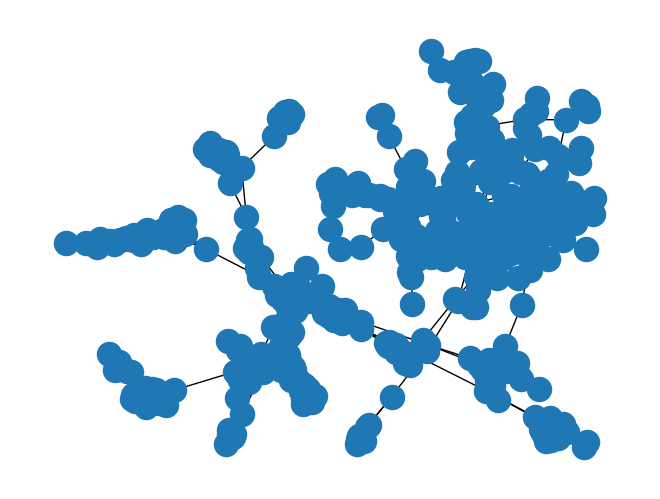

In [ ]:
nx.draw(G)

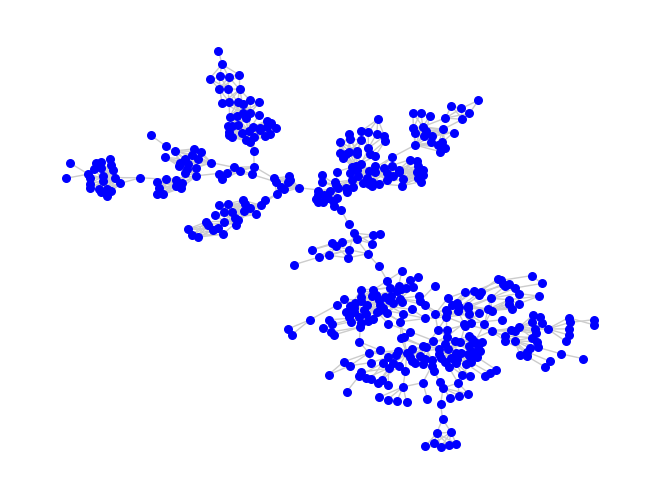

In [ ]:
nx.draw_kamada_kawai(G, with_labels=False, node_size=30, font_size=7, node_color="blue", edge_color="#CCC")

### Análisis del grafo

Una vez cargado el grafo, procedamos a analizar sus características básicas.

In [ ]:
numNodos = G.number_of_nodes()
numAristas = G.number_of_edges()
density = nx.density(G)
grado_medio = sum([nodo[1] for nodo in list(G.degree)])/numNodos
radio = nx.radius(G)
diam = nx.diameter(G)
print(f"El grafo de estudio tiene {numNodos} nodos")
print(f"El grafo de estudio tiene {numAristas} aristas")
print(f"La densidad del grafo es de {density*100:.2f} %")
print(f"El grado medio de los nodos del grafo es de {grado_medio:.2} aproximadamente")
print(f"El radio del grafo es de {radio} y el diámetro de {diam} ")

El grafo de estudio tiene 475 nodos
El grafo de estudio tiene 1184 aristas
La densidad del grafo es de 1.05 %
El grado medio de los nodos del grafo es de 5.0 aproximadamente
El radio del grafo es de 14 y el diámetro de 28 


Veamos si el grafo es candidato a ser dividido en comunidades. Para ello, medimos la transitividad de grafo.

In [ ]:
tran = nx.transitivity(G)
print(f"La transitividad del grafo de estudio es de {tran:.2f}")

La transitividad del grafo de estudio es de 0.40


### Análisis de los nodos del grafo

Aprovecharemos que los nodos del grafo contienen información relativa a las comunidades reales a las que pertenecen para analizar dicha información.

Función auxiliar `get_communities_from_nodes`: Función que devuelve una lista de comunidades. Se ha empleado para encontrar la fragmentación en comunidades real del grafo original.

Parámetros:
- `G`: El grafo sobre el que se está trabajando.
- `num_comunidades`: El número de comunidades.

In [ ]:
def get_communities_from_nodes(G, num_comunidades):
  nodos = G.nodes
  comunidades = [[] for _ in range(num_comunidades)]
  for nodo in nodos:
    comunidades[nodos[nodo]["community"]].append(nodo)
  return comunidades

In [ ]:
set([G.nodes[nodo]["community"] for nodo in G.nodes])

{0, 1, 2, 3, 4, 5, 6, 7}

In [ ]:
comunidades_originales = get_communities_from_nodes(G, 8)

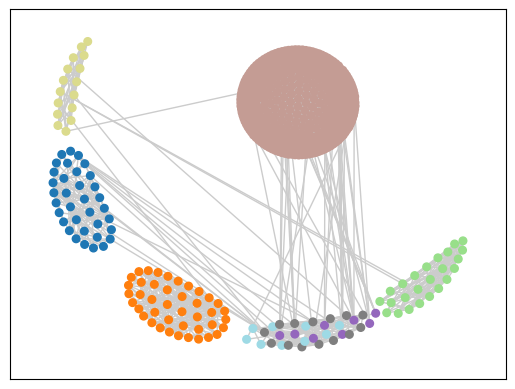

In [ ]:
draw_with_communities(G, comunidades_originales, with_labels=False)

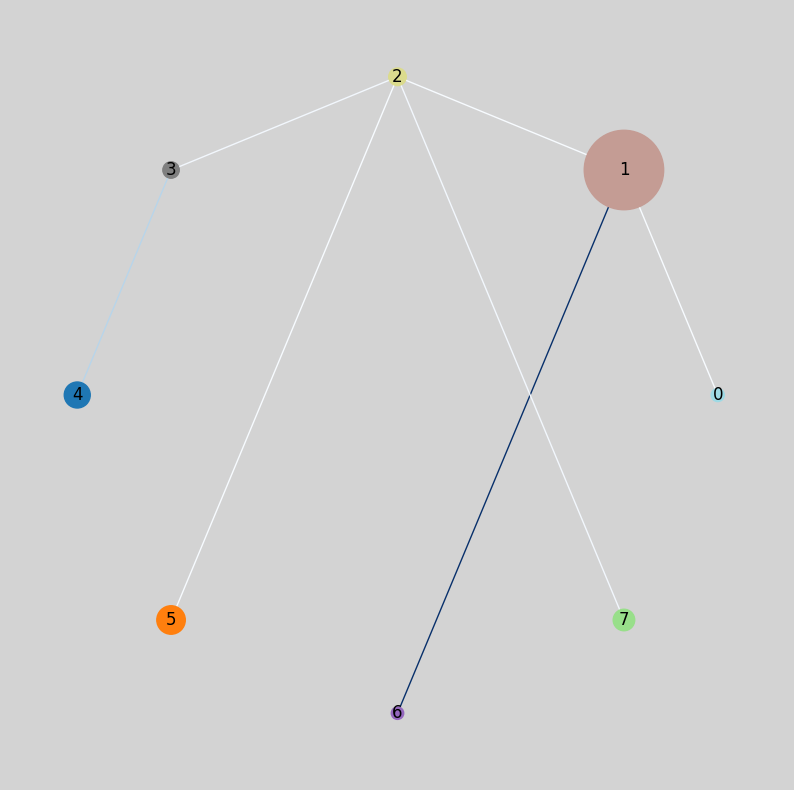

In [ ]:
draw_kamada(G)

## Ejercicio A – Estructura de comunidad con Leiden

Utiliza el algoritmo de Leiden para optimizar la modularidad y buscar la estructura de comunidad de la red. Compara cuanto se parece la estructura de comunidad encontrada con Leiden con la estructura real de los grupos de la red ¿La estructura de comunidad encontrada por el algoritmo de Leiden se acerca a la correcta? ¿En qué se diferencia?

### Aplicación del algoritmo de Leiden

En esta sección aplicaremos el algoritmo de Leiden sobre el grafo a fin de generar comunidades para su estudio.

In [ ]:
leiden = algorithms.leiden(G)
leiden_comunities = leiden.communities
leiden_modularity = nx.community.modularity(G, leiden_comunities)
print(f"Modularidad de las comunidades generadas con el algoritmo de Leiden: {leiden_modularity:.2f}")

Modularidad de las comunidades generadas con el algoritmo de Leiden: 0.88


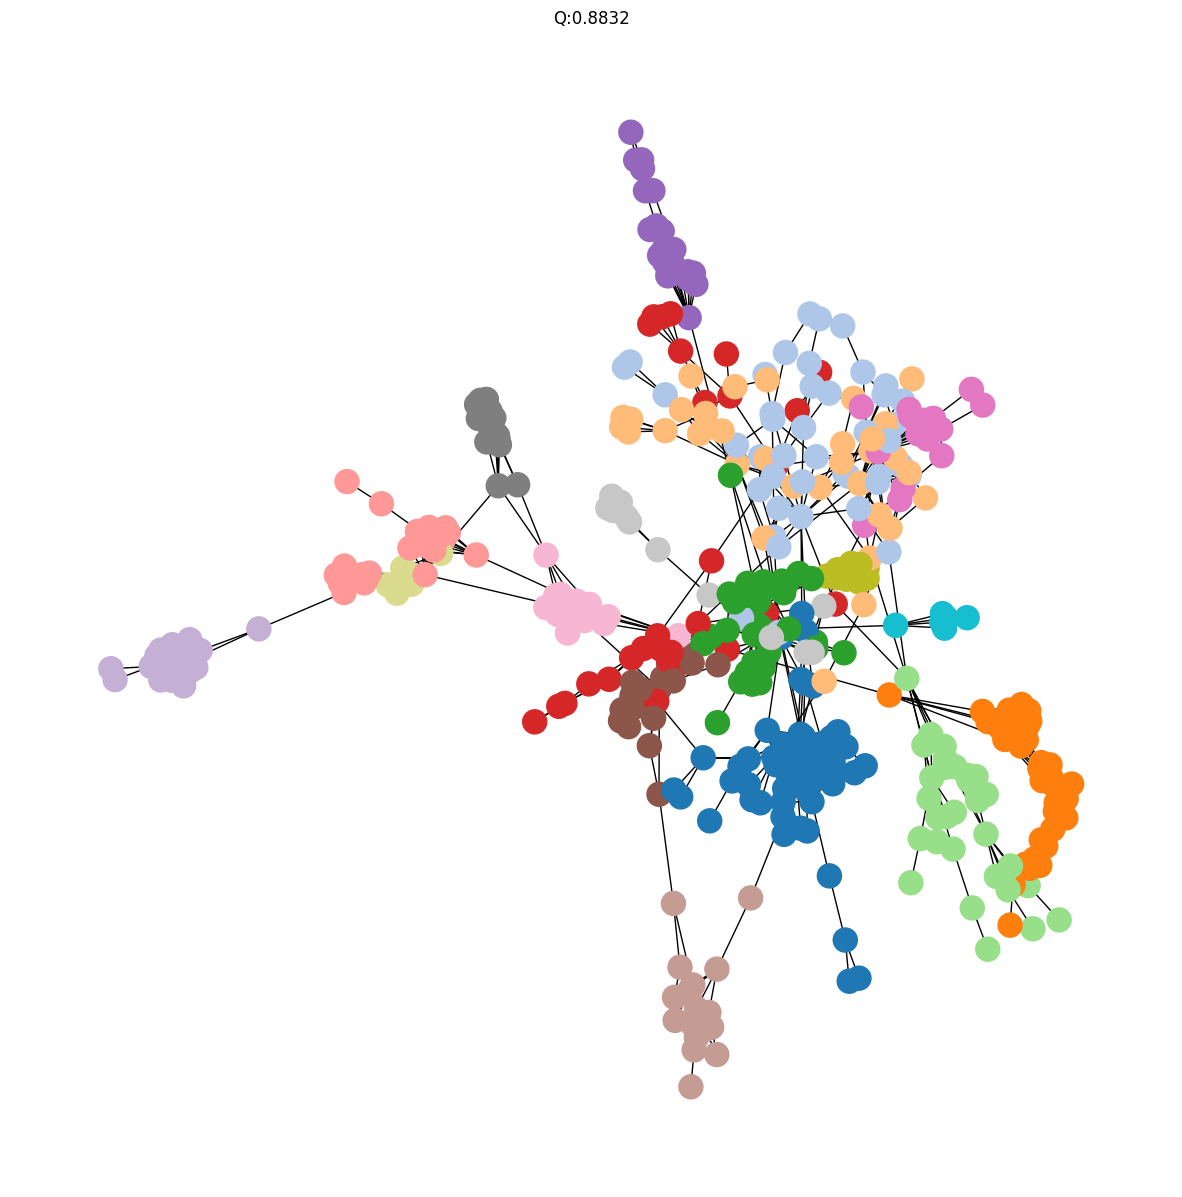

In [ ]:
_,ax = plt.subplots(1,figsize=(15, 15))
coms = {k:v[0] for k,v in leiden.to_node_community_map().items()}
draw_communities(coms, ax, with_labels=False)

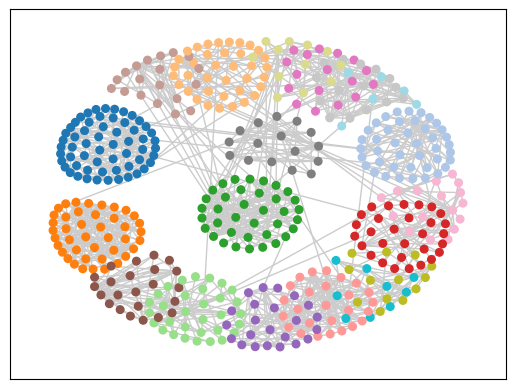

In [ ]:
draw_with_communities(G, leiden_comunities, with_labels=False)

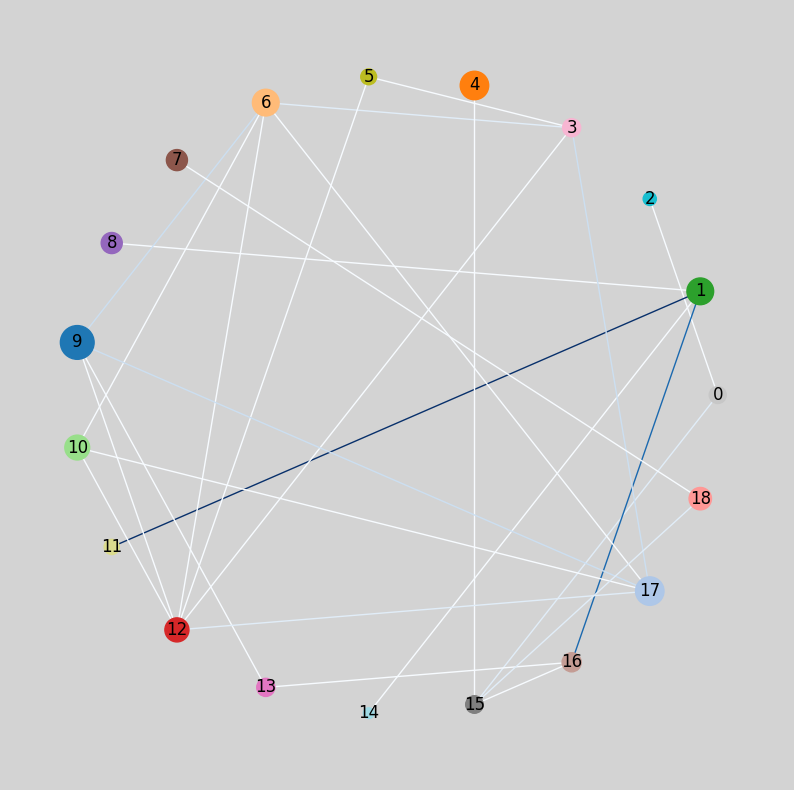

In [ ]:
draw_kamada(G)

### Comparación con las comunidades reales

En esta sección se compararán las comunidades generados por Leiden en la sección anterior y las comunidades originales a fin de ver si son parecidas y si el algoritmo de Leiden es capaz de identificar, correctamente, las comunidades reales.


#### Número de comunidades:

In [ ]:
print(f"Las comunidades auténticas son {len(comunidades_originales)}, Leiden optimiza a {len(leiden_comunities)} comunidades.")

Las comunidades auténticas son 8, Leiden optimiza a 19 comunidades.


#### Número de nodos por comunidad

Comunidades reales:

| Comunidad | Número de nodos |
| --- | --- |
| 4 | 327 |
| 1 | 42 |
| 0 | 35 |
| 2 | 24 |
| 6 | 16 |
| 5 | 14 |
| 7 | 9 |
| 3 | 8 |

Comunidades Leiden:

In [ ]:
print("Las comunidades generadas por el algoritmo de Leiden presentan las siguientes demografías:")
for i, comunity in enumerate(leiden_comunities):
  print(f"Comunidad {i:2}. Número de nodos: {len(comunity)}")

Las comunidades generadas por el algoritmo de Leiden presentan las siguientes demografías:
Comunidad  0. Número de nodos: 59
Comunidad  1. Número de nodos: 42
Comunidad  2. Número de nodos: 42
Comunidad  3. Número de nodos: 37
Comunidad  4. Número de nodos: 37
Comunidad  5. Número de nodos: 32
Comunidad  6. Número de nodos: 30
Comunidad  7. Número de nodos: 26
Comunidad  8. Número de nodos: 23
Comunidad  9. Número de nodos: 23
Comunidad 10. Número de nodos: 19
Comunidad 11. Número de nodos: 17
Comunidad 12. Número de nodos: 17
Comunidad 13. Número de nodos: 16
Comunidad 14. Número de nodos: 15
Comunidad 15. Número de nodos: 13
Comunidad 16. Número de nodos: 12
Comunidad 17. Número de nodos: 9
Comunidad 18. Número de nodos: 6


#### Comparación con las comunidades reales

En esta subsección se estudia como se han distribuido los nodos en las nuevas comunidades y si se ha conservado alguna de las comunidades originales.

Función auxiliar `find_comunidad_origen`: Función que, dado un nodo, indica a cual de las comunidades originales pertenecía ese nodo.

Parámetros:
- `nodo`: El nodo cuyo origen deseamos saber.
- `comunidades_originales`: Las comunidades originales.

In [ ]:
def find_comunidad_origen(nodo, comunidades_originales):
  for comunidad, nodos in enumerate(comunidades_originales):
    if nodo in nodos:
      return comunidad

Función `get_info_origenes`: Función que calcula una serie de informaciones respecto a la correlación de dos comunidades.

Parámetros:
- `comunidades_leiden`: Las comunidades formadas por Leiden.
- `comunidades_originales`: Las comunidades originales.

In [ ]:
def get_info_origenes(comunidades_leiden, comunidades_originales):
  contador_origenes = {}
  porcentaje_destinos = {comunidad_origen:[0 for _ in range(len(comunidades_leiden))] for comunidad_origen in range(len(comunidades_originales))}

  for comunidad, nodos in enumerate(comunidades_leiden):
    contador_origenes[comunidad] = [0 for _ in range(len(comunidades_originales))]

    for nodo in nodos:
      comunidad_origen = find_comunidad_origen(nodo, comunidades_originales)
      contador_origenes[comunidad][comunidad_origen] += 1
    for comunidad_origen, cantidad_nodos in enumerate(contador_origenes[comunidad]):
      porcentaje = cantidad_nodos / len(comunidades_originales[comunidad_origen])
      porcentaje_destinos[comunidad_origen][comunidad] = porcentaje * 100

  return contador_origenes, porcentaje_destinos

Función auxiliar `print_info_origenes`: Función que muestra por pantalla información relativa al origen de los nodos que haya en cada comunidad. Para cada comunidad indica el origen de los mismos y el porcentaje que representan.

Parámetros:
- `contador_origenes`: La información relativa a los origenes de los nodos de cada comunidad.
- `porcentaje_destinos`: La información relativa a los destinos de los nodos de las comunidades originales.

In [ ]:
def print_info_origenes(contador_origenes, porcentaje_destinos):
  for comunidad in contador_origenes.keys():
    print(f"La comunidad {comunidad} tiene los siguientes origenes de nodos:")
    for comunidad_origen, contador in enumerate(contador_origenes[comunidad]):
      if contador > 0:
        print(f"{contador} nodos de la comunidad {comunidad_origen} (un {porcentaje_destinos[comunidad_origen][comunidad]:.2f}%)")
    print("")

Función auxiliar `print_info_destinos`: Función que muestra por pantalla información relativa al destino de los nodos que había en cada comunidad de origen. Para cada comunidad de origen, indica a qué comunidades han ido sus nodos y qué porcentaje de la comunidad original representan.

Parámetros:
- `porcentaje_destinos`: La información relativa a los destinos de los nodos de las comunidades originales.

In [ ]:
def print_info_destinos(porcentaje_destinos):
  for comunidad_origen in porcentaje_destinos.keys():
    print(f"La comunidad original {comunidad_origen} se ha dispersado en las siguientes comunidades:")
    for comunidad, porcentaje in enumerate(porcentaje_destinos[comunidad_origen]):
      if porcentaje > 0:
        print(f"Un {porcentaje:.2f}% en la comunidad {comunidad}")
    print("")

Información relativa a los origenes y destinos de los nodos en las comunidades originales y las generadas por Leiden.

In [ ]:
contador_origenes, porcentaje_destinos = get_info_origenes(leiden_comunities, comunidades_originales)

In [ ]:
print_info_origenes(contador_origenes, porcentaje_destinos)

La comunidad 0 tiene los siguientes origenes de nodos:
59 nodos de la comunidad 4 (un 18.04%)

La comunidad 1 tiene los siguientes origenes de nodos:
42 nodos de la comunidad 4 (un 12.84%)

La comunidad 2 tiene los siguientes origenes de nodos:
42 nodos de la comunidad 1 (un 100.00%)

La comunidad 3 tiene los siguientes origenes de nodos:
37 nodos de la comunidad 4 (un 11.31%)

La comunidad 4 tiene los siguientes origenes de nodos:
3 nodos de la comunidad 3 (un 37.50%)
34 nodos de la comunidad 4 (un 10.40%)

La comunidad 5 tiene los siguientes origenes de nodos:
32 nodos de la comunidad 4 (un 9.79%)

La comunidad 6 tiene los siguientes origenes de nodos:
30 nodos de la comunidad 4 (un 9.17%)

La comunidad 7 tiene los siguientes origenes de nodos:
12 nodos de la comunidad 0 (un 34.29%)
14 nodos de la comunidad 5 (un 100.00%)

La comunidad 8 tiene los siguientes origenes de nodos:
3 nodos de la comunidad 3 (un 37.50%)
20 nodos de la comunidad 4 (un 6.12%)

La comunidad 9 tiene los siguie

In [ ]:
print_info_destinos(porcentaje_destinos)

La comunidad original 0 se ha dispersado en las siguientes comunidades:
Un 34.29% en la comunidad 7
Un 65.71% en la comunidad 9

La comunidad original 1 se ha dispersado en las siguientes comunidades:
Un 100.00% en la comunidad 2

La comunidad original 2 se ha dispersado en las siguientes comunidades:
Un 62.50% en la comunidad 14
Un 37.50% en la comunidad 17

La comunidad original 3 se ha dispersado en las siguientes comunidades:
Un 37.50% en la comunidad 4
Un 37.50% en la comunidad 8
Un 25.00% en la comunidad 10

La comunidad original 4 se ha dispersado en las siguientes comunidades:
Un 18.04% en la comunidad 0
Un 12.84% en la comunidad 1
Un 11.31% en la comunidad 3
Un 10.40% en la comunidad 4
Un 9.79% en la comunidad 5
Un 9.17% en la comunidad 6
Un 6.12% en la comunidad 8
Un 5.20% en la comunidad 10
Un 5.20% en la comunidad 11
Un 5.20% en la comunidad 12
Un 1.22% en la comunidad 15
Un 3.67% en la comunidad 16
Un 1.83% en la comunidad 18

La comunidad original 5 se ha dispersado en la

## Ejercicio B – Algoritmo Evolutivo multiobjetivo

Diseñar un algoritmo evolutivo para la detección de comunidades.

### Definición del algoritmo genético común

En esta sección se plantearán todas las funcionalidades necesarias para el desarrollo, no de uno, si no de 4 algoritmos distintos:
* NSGA2 sin crowding
* NSGA2 tradicional
* SPEA
* Tulipán (algoritmo de diseño propio)

#### Función de traducción

Función auxiliar `get_vecinos_en_comunidad`: Función que devuelve todos los vecinos que tenga un nodo en una comunidad.

Parámetros:
- `G`: El grafo sobre el que se está trabajando.
- `comunidad`: La comunidad de la cual se quieren extraer los vecinos.
- `nodo`: El nodo cuyos vecinos queremos obtener.

In [ ]:
def get_vecinos_en_comunidad(G, comunidad, nodo):
  vecinos = [vecino for vecino in list(G.neighbors(nodo)) if vecino in comunidad]
  return vecinos

Función auxiliar `get_matriz_adyacencia`: Función que devuelve la matriz de adyacencia de los nodos de una comunidad.

Parámetros:
- `G`: El grafo sobre el que se está trabajando.
- `comunidad`: La comunidad de la cual se quiere extraer la matriz.

In [ ]:
def get_matriz_adyacencia(G, comunidad):
  matriz = [[0 for _ in range(len(comunidad))] for _ in range(len(comunidad))]

  for i, nodo in enumerate(comunidad):
    vecinos = get_vecinos_en_comunidad(G, comunidad, nodo)
    indices_vecinos = [comunidad.index(vecino) for vecino in vecinos]
    for indice_vecino in indices_vecinos:
      matriz[i][indice_vecino] = 1
  return matriz

Función auxiliar `get_indice_comunidad`: Función que devuelve el índice de la comunidad a la que ha sido asignado un nodo o `None` en caso de que no haya sido asignado aún a ninguna.

Parámetros:
- `comunidades`: Lista de comunidades de nodos.
- `nodo`: Nodo cuyo indice se desea conocer.

In [ ]:
def get_indice_comunidad(comunidades, nodo):
  for indice, comunidad in enumerate(comunidades):
    if nodo in comunidad:
      return indice
  return None

Función `get_locus`: Función que devuelve la representación locus de un conjunto de comunidades.

Parámetros:
- `G`: El grafo sobre el que se está trabajando.
- `comunidades`: Lista de comunidades de nodos.
- `nodos`: Lista con los nodos del grafo.

In [ ]:
def get_locus(G, comunidades, nodos):
  locus = ["" for _ in range(len(nodos))]

  for comunidad in comunidades:
    matriz = get_matriz_adyacencia(G, comunidad)

    for _ in range(len(comunidad)):
      fila_min = min(matriz, key=lambda x: sum(x))
      indice_min = matriz.index( fila_min )
      ind_min = comunidad[indice_min]

      posibles_indices_vecinos = [i for i in range(len(fila_min)) if fila_min[i] == 1]
      if len(posibles_indices_vecinos) > 0:
        indice_vecino_elegido = random.choice(posibles_indices_vecinos)
        vecino_elegido = comunidad[indice_vecino_elegido]
        locus[nodos.index(ind_min)] = vecino_elegido
      else:
        locus[nodos.index(ind_min)] = ind_min

      for fila in matriz:
        fila[indice_min] = 0
      for i in range(len(fila_min)):
        fila_min[i] = float("inf")

  return locus

Prueba del método:

In [ ]:
locus_original = get_locus(G, comunidades_originales, list(G.nodes))
print(locus_original)

['182923', '480479', '521655', '152407', '230788', '189286', '394886', '389895', '187924', '186386', '256445', '542319', '83906', '49424', '196682', '542319', '132756', '126441', '116969', '279830', '117287', '80756', '99182', '491667', '41336', '345901', '141635', '30690', '221281', '27890', '52785', '434830', '521655', '394886', '60211', '377247', '446298', '77701', '500861', '301889', '196682', '203272', '126433', '181025', '352553', '280255', '462210', '521655', '435398', '123953', '482622', '29354', '401173', '401798', '35067', '314250', '30093', '313801', '366824', '116969', '229209', '30962', '361524', '123953', '229209', '150207', '230788', '14076', '279830', '19509', '196008', '79870', '396502', '480479', '480479', '202986', '85382', '396502', '525489', '14076', '300975', '330328', '132763', '123181', '19509', '185312', '189286', '166549', '67572', '79870', '149809', '221801', '401449', '383731', '19509', '190765', '18041', '230788', '84693', '142115', '271643', '473001', '980

Problema con las comunidades originales: No están conexas, no pueden formar un locus.

In [ ]:
comunidades_originales[3]

['34895', '366824', '116969', '355378', '343306', '443731', '38265', '347716']

In [ ]:
get_matriz_adyacencia(G, comunidades_originales[3])

[[0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0]]

In [ ]:
for i, nodo in enumerate(comunidades_originales[3]):
  print(f"Nodo({i}): {nodo}, vecinos: {list(G.neighbors(nodo))}")

Nodo(0): 34895, vecinos: ['67572', '92472', '116969', '306636', '542633']
Nodo(1): 366824, vecinos: ['127262', '318538']
Nodo(2): 116969, vecinos: ['34895', '67572', '141618', '306636', '542633']
Nodo(3): 355378, vecinos: ['221281', '383087', '502212', '263093', '229209']
Nodo(4): 343306, vecinos: ['205838', '277617', '273775', '482584', '542633']
Nodo(5): 443731, vecinos: ['458993', '229209']
Nodo(6): 38265, vecinos: ['458993', '43379', '33251', '287582', '52500', '98081', '229209', '423864']
Nodo(7): 347716, vecinos: ['383087', '502212', '289953', '182201', '229209']


A la vista de los anteriores datos se puede apreciar que hay componentes en las comunidades que no están conectadas a ningún otro nodo de la misma comunidad.

Como es requisito usar la codificación de locus y esta requiere que las componentes sean conexas, es inviable traducir a locus las comunidades originales para este grafo.

Prueba con un grafo que si pueda representarse en locus:

Dado que el grafo original tiene componentes inconexas en sus comunidades (lo cual imposibilita su representación en locus), crearemos una pequeña variante del grafo original (pero con muchas más aristas, se ha convertido en un grafo completo) para que si sea posible representar las comunidades originales con formato locus.

In [ ]:
G_prueba = copy.deepcopy(G)

# Conversión a grafo completo:
for i, nodo in enumerate(list(G_prueba.nodes)):
  for otro_nodo in list(G_prueba.nodes):
    if nodo != otro_nodo:
      G_prueba.add_edge(nodo, otro_nodo)

In [ ]:
get_matriz_adyacencia(G_prueba, comunidades_originales[3])

[[0, 1, 1, 1, 1, 1, 1, 1],
 [1, 0, 1, 1, 1, 1, 1, 1],
 [1, 1, 0, 1, 1, 1, 1, 1],
 [1, 1, 1, 0, 1, 1, 1, 1],
 [1, 1, 1, 1, 0, 1, 1, 1],
 [1, 1, 1, 1, 1, 0, 1, 1],
 [1, 1, 1, 1, 1, 1, 0, 1],
 [1, 1, 1, 1, 1, 1, 1, 0]]

In [ ]:
comunidades_originales[3]

['34895', '366824', '116969', '355378', '343306', '443731', '38265', '347716']

In [ ]:
locus_prueba = get_locus(G_prueba, comunidades_originales, list(G.nodes))
mini_locus = [locus_prueba[list(G_prueba.nodes).index(nodo)] for nodo in comunidades_originales[3]]
print(mini_locus)

['347716', '38265', '355378', '343306', '443731', '38265', '347716', '347716']


Función `traduccion_locus`: Función que, dado un individuo codificado en locus, devuelve una lista de comunidades fruto de interpretar su estructura.

Parámetros:
- `G`: Grafo cuyos nodos han sido codificados en la representación locus.
- `ind`: Individuo cuya representación locus se quiere traducir.

In [ ]:
def traduccion_locus(G, ind):
  comunidades = []
  nodes = list(G.nodes)

  for indice in range(len(ind)):
    nodo_actual = nodes[indice]
    nodo_apuntado = ind[indice]
    indice_comunidad = get_indice_comunidad(comunidades, nodo_actual)
    indice_comunidad_apuntado = get_indice_comunidad(comunidades, nodo_apuntado)

    if indice_comunidad is not None and indice_comunidad_apuntado is not None and indice_comunidad != indice_comunidad_apuntado:
      comunidades[indice_comunidad].extend(comunidades[indice_comunidad_apuntado])
      comunidades.pop(indice_comunidad_apuntado)
    elif indice_comunidad is None and indice_comunidad_apuntado is None:
      nueva_comunidad = [nodo_actual]
      if nodo_actual != nodo_apuntado:
        nueva_comunidad.append(nodo_apuntado)
      comunidades.append(nueva_comunidad)
    elif indice_comunidad is not None and indice_comunidad_apuntado is None:
      comunidades[indice_comunidad].append(nodo_apuntado)
    elif indice_comunidad is None and indice_comunidad_apuntado is not None:
      comunidades[indice_comunidad_apuntado].append(nodo_actual)
  return comunidades

Ejemplo de jueguete: Para hacer funcionar este ejemplo de jueguete, ha sido necesario "fingir" que la variable aux era grafo con nodos. Para ello se ha empleado un dataframe con una columna `nodes`.

In [ ]:
locus = [2, 3, 3, 4, 4, 5, 9, 7, 8, 9]
aux = list(range(1, 11))
aux = pd.DataFrame({"nodes":aux})
print(traduccion_locus(aux, locus))

[[1, 2, 3], [4, 5, 6], [7, 9, 8, 10]]


Ejemplo traduciendo el locus de las comunidades originales:

In [ ]:
aux = traduccion_locus(G_prueba, locus_prueba)

In [ ]:
len(aux)

8

In [ ]:
print(f"Número de comunidades originales: {len(comunidades_originales)}. Número de las comunidades traducidas: {len(aux)}.")

originales_ordenadas = sorted(comunidades_originales, key=lambda com: len(com))
originales_traducidas = sorted(aux, key=lambda com: len(com))

for i in range(len(originales_ordenadas)):
  print(f"Tamaño original: {len(originales_ordenadas[i])}, tamaño traducida: {len(originales_traducidas[i])}.")
  todos_iguales = True
  j = 0
  while todos_iguales and j < len(originales_ordenadas[i]):
    todos_iguales = (originales_ordenadas[i][j] in originales_traducidas[i])
    j += 1
  j = 0
  while todos_iguales and j < len(originales_traducidas[i]):
    todos_iguales = (originales_traducidas[i][j] in originales_ordenadas[i])
    j += 1
  if todos_iguales:
    print("Las dos comunidades son iguales.")
  else:
    print("Difieren.")
  print("")

Número de comunidades originales: 8. Número de las comunidades traducidas: 8.
Tamaño original: 8, tamaño traducida: 8.
Las dos comunidades son iguales.

Tamaño original: 9, tamaño traducida: 9.
Las dos comunidades son iguales.

Tamaño original: 14, tamaño traducida: 14.
Las dos comunidades son iguales.

Tamaño original: 16, tamaño traducida: 16.
Las dos comunidades son iguales.

Tamaño original: 24, tamaño traducida: 24.
Las dos comunidades son iguales.

Tamaño original: 35, tamaño traducida: 35.
Las dos comunidades son iguales.

Tamaño original: 42, tamaño traducida: 42.
Las dos comunidades son iguales.

Tamaño original: 327, tamaño traducida: 327.
Las dos comunidades son iguales.



#### Definición de Fitness

En el enunciado de la práctica se pide seleccionar dos métricas con una gran correlación negativa de las presentes en un paper. En nuestro caso seleccionamos la *community score* y la *internal density* como métricas ya que ambas cuentan con una gran correlación negativa.

Además, dado que no nos ha sido posible encontrar implementaciones como las del paper, hemos decidido implementar nosotros mismos dichas métricas.

Función `community_score`: Función que devuelve la métrica de *community score* resultante de evaluar unas comunidades de un grafo.

Parámetros:
- `G`: El grafo del que se quieren evaluar las comunidades.
- `comunidades`: Las comunidades que se quieren evaluar.

In [ ]:
# Metrica 1: Community score
def community_score(G, comunidades):
  communityS = 0
  for comunidad in comunidades:
    sub_grafo = G.subgraph(comunidad)
    num_aristas = sub_grafo.number_of_edges()
    num_nodos = sub_grafo.number_of_nodes()
    communityS += (2 * num_aristas / num_nodos)**2
  return -communityS

Función `internal_density`: Función que devuelve la métrica de *internal density* resultante de evaluar unas comunidades de un grafo.

Parámetros:
- `G`: El grafo del que se quieren evaluar las comunidades.
- `comunidades`: Las comunidades que se quieren evaluar.

In [ ]:
# Metrica 2: Internal density
def internal_density(G, comunidades):
  internalD = 0
  for comunidad in comunidades:
    sub_grafo = G.subgraph(comunidad)
    num_aristas = sub_grafo.number_of_edges()
    num_nodos = sub_grafo.number_of_nodes()

    # Si solo hay 1 nodo, la división da 0 y explota.
    # Para evitarlo, si solo hay un nodo forzamos que la métrica valga 1 directamente.
    if num_nodos > 1:
      internalD += (1 - (2*num_aristas / (num_nodos * (num_nodos - 1))) )
    else:
      internalD += 1
  return internalD

Función `fitness`: Función que evalua tanto la *community score* como la *internal density* de un conjunto de comunidades de un grafo. En este caso, dada una representación locus de un conjunto de comunidades, la función traduce dicha representación a un conjunto de comunidades y procede a evaluar con el las métricas.

Parámetros:
- `G`: El grafo del que se quieren evaluar las comunidades.
- `ind`: Representación locus de las comunidades de un grafo.

In [ ]:
def fitness(G, ind):
  comunidades = traduccion_locus(G, ind)
  return community_score(G, comunidades), internal_density(G, comunidades)

#### Ordenación de poblacion

Función `sort_pop`: Función que ordena y devuelve una población de individuos en función de una métrica de ordenación.

Parámetros:
- `pop`: La población que se quiere ordenar.
- `metrica_ordenacion`: La métrica respecto a la cual se quiere ordenar la población.

In [ ]:
def sort_pop (pop, metrica_ordenacion):
  poblacion_ordenada = sorted(pop, key=lambda x: metrica_ordenacion[pop.index(x)] )
  return (sorted(metrica_ordenacion), poblacion_ordenada)

#### Creación

Función `create`: Función que inicializa una población de individuos aleatorios con forma de locus. La fragmentación en comunidades se realiza de forma aleatoria.

Parámetros:
- `G`: Grafo que contiene los nodos con los que generar los locus.
- `N`: Número de individuos a crear. Por defecto `N=100`.

In [ ]:
def create (G, N=100):
  poblacion = []
  nodos = list(G.nodes)
  for _ in range(N):
    individuo = [random.choice(list(G.neighbors(nodo))) for nodo in nodos]
    poblacion.append(individuo)
  return poblacion

Función `create_leiden`: Función que inicializa una población de individuos con forma de locus. La fragmentación en comunidades se realiza mediante el algoritmo de Leiden.

Parámetros:
- `G`: Grafo que contiene los nodos con los que generar los locus.
- `N`: Número de individuos a crear. Por defecto `N=100`.

In [ ]:
def create_leiden(G, N=100):
  pop = []
  nodos = list(G.nodes)
  for _ in range(N):
    leiden = algorithms.leiden(G)
    leiden_comunities = leiden.communities
    pop.append(get_locus(G, leiden_comunities, nodos))
  return pop

#### Cruce

Función `crossover_mascara`: Función encargada de realizar el emparejamiento entre dos individuos con una probabilidad `pcross`. En este caso, se trata de un cruze mediante máscara.

Parámetros:
- `ind1`: Progenitor 1.
- `ind2`: Progenitor 2.
- `pcross`: Probabilidad de que el cruze de los dos individuos se lleve a cabo.

In [ ]:
def crossover_mascara (ind1, ind2, pcross):
  hijo1 = copy.deepcopy(ind1)
  hijo2 = copy.deepcopy(ind2)

  if random.random() < pcross:
    mascara = [random.random() >= 0.5 for _ in range(len(ind1))]
    genes_hijo1 = [valor for i, valor in enumerate(hijo1) if mascara[i]]
    genes_hijo2 = [valor for i, valor in enumerate(hijo2) if mascara[i]]

    for i in range(len(genes_hijo1)):
      if not mascara[i]:
        genes_hijo1 = ind2[i]
        genes_hijo2 = ind1[i]

  return hijo1, hijo2

Función auxiliar `get_puntos_corte`: Función que devuelve `num_puntos_corte` puntos de corte para realizar el emparejamiento por puntos entre dos individuos.

Parámetros:
- `num_puntos_corte`: El número de puntos de corte que se desea obtener para el emparejamiento por puntos.
- `len_ind`: La longitud de los individuos que van a ser emparejados.

In [ ]:
def get_puntos_corte(num_puntos_corte, len_ind):
  puntos_corte = []
  while len(puntos_corte) < num_puntos_corte:
    punto_corte = random.randint(0, len_ind - 1)
    if punto_corte not in puntos_corte:
      puntos_corte.append(punto_corte)
  return sorted(puntos_corte)

Función `crossover_puntos`: Función encargada de realizar el emparejamiento entre dos individuos con una probabilidad `pcross`. En este caso, se trata de un cruze por puntos.

Parámetros:
- `ind1`: Progenitor 1.
- `ind2`: Progenitor 2.
- `pcross`: Probabilidad de que el cruze de los dos individuos se lleve a cabo.

In [ ]:
def crossover_puntos (ind1, ind2, pcross):
  hijo1 = copy.deepcopy(ind1)
  hijo2 = copy.deepcopy(ind2)

  if random.random() < pcross:
    num_puntos_corte = random.randint(1, 3)
    puntos_corte = get_puntos_corte(num_puntos_corte, len(ind1))
    cambio_padre = True

    for i in range(len(hijo1)):
      hijo1[i] = ind1[i] if cambio_padre else ind2[i]
      hijo2[i] = ind2[i] if cambio_padre else ind1[i]
      if i in puntos_corte:
        cambio_padre = not cambio_padre

  return hijo1, hijo2

Función `crossover`: Función encargada de realizar el emparejamiento entre dos individuos con una probabilidad `pcross`. En este caso recibe una lista de posibles formas de curce y escoge y realiza una al azar.

Parámetros:
- `cruces`: Lista de posibles formas de curce.
- `ind1`: Progenitor 1.
- `ind2`: Progenitor 2.
- `pcross`: Probabilidad de que el cruze de los dos individuos se lleve a cabo.

In [ ]:
def crossover (cruces, ind1, ind2, pcross):
  cruce_a_usar = random.choice(cruces)
  return cruce_a_usar(ind1, ind2, pcross)

#### Función selección

Función `selectTorneo`: Función que selecciona, mediante selección por torneo, un individuo de la población. Funciona haciendo "competir" entre si a `T` individuos aleatorios y quedándose con el mejor de los `T` seleccionados.

Parámetros:
- `pop`: La población de individuos en la que se va a llevar a cabo la selección.
- `T`: El número de individuos que compiten entre si a la hora de realizar la selección.

In [ ]:
def selectTorneo (pop, T=2):
  elegidos = [random.choice(range(len(pop))) for _ in range(T)]
  seleccionado = min(elegidos)
  return copy.deepcopy(pop[seleccionado])

Función `selectRango`: Función que selecciona, mediante selección por rango, un individuo de la población. Dada una población ordenada, esta selección funciona intentando seleccionar con probabilidad `psel` cada individuo (desde el mejor hasta el peor). Si un individuo no es seleccionado se intenta seleccionar el siguiente mejor hasta seleccionar un individuo o llegar al último (que es seleccionado como última opción).

Parámetros:
- `pop`: La población de individuos en la que se va a llevar a cabo la selección.
- `psel`: La probabilidad de que se seleccione un individuo.

In [ ]:
def selectRango(pop, psel=0.2):
  for ind in pop:
    if random.random() < psel:
      return ind
  return pop[-1]

#### Función de mutación

Función `mutate_random`: Función que muta mediante intercambio los genes, escogiendo al azar un nuevo nodo vecino, los genes de los individuos.

Parámetros:
- `G`: Grafo sobre el que se está llevando a cabo el algortimo genético.
- `ind`: Individuo en el que se quiere llevar a cabo las mutaciones.
- `pmut`: Probabilidad de que la mutación se lleve o no a cabo.

In [ ]:
def mutate_random (G, ind, pmut):
  for indice in range(len(ind)):
    if random.random() < pmut:
      nodo_actual = list(G.nodes)[indice]
      ind[indice] = random.choice(list(G.neighbors(nodo_actual)))
  return ind

Función `mutate_steal`: Función que muta, mediante robo, los genes del individuo. Funciona escogiendo al azar a otro individuo de la población y copiándole algunos de sus genes al azar.

Parámetros:
- `pop`: Población de individuos.
- `ind`: Individuo en el que se quiere llevar a cabo las mutaciones.
- `pmut`: Probabilidad de que la mutación se lleve o no a cabo.



In [ ]:
def mutate_steal (pop, ind, pmut):
  for indice in range(len(ind)):
    if random.random() < pmut:
      nuevo_gen = random.choice(pop)[indice]
      ind[indice] = nuevo_gen
  return ind

Función de mutación general `mutate`: Función que permite emplear más de una mutación a la hora de evolucionar las generaciones. Funciona seleccionando de manera aleatoria una mutación de las dos implementadas.

Parámetros:
- `G`: Grafo sobre el que se está llevando a cabo el algoritmo genético.
- `pop`: Población de individuos.
- `mutaciones`: Lista con las posibles mutaciones que pueden llevarse a cabo.
- `ind`: Individuo en el que se quiere llevar a cabo las mutaciones.
- `pmut`: Probabilidad de que la mutación se lleve a cabo o no.

In [ ]:
def mutate (G, pop, mutaciones, ind, pmut):
  ind_mutado = None
  mutacion_usada = None
  mutacion = random.choice(mutaciones)

  match mutacion:
    case "mutate_random":
      ind_mutado = mutate_random(G, ind, pmut)
      mutacion_usada = mutate_random
    case "mutate_steal":
      ind_mutado = mutate_steal(pop, ind, pmut)
      mutacion_usada = mutate_steal
  return ind_mutado, mutacion

#### Función de dominancia

Función auxiliar `es_dominado`: Función que, dados dos fitness de dos individuos distintos, devuelve `True` si el primer individuo es dominado por el segundo o `False` si no.

Parámetros:
- `fitness1`: Fitness del primer individuo.
- `fitness2`: Fitness del segundo individuo.

In [ ]:
def es_dominado(fitness1, fitness2):
  # Igual o mejor en todas las métricas y mejor en, al menos, una métrica
  return all(f2 <= f1 for f1, f2 in zip(fitness1, fitness2)) and any(f2 < f1 for f1, f2 in zip(fitness1, fitness2))

Prueba:

In [ ]:
es_dominado( (1, 1), (2, 2) )

False

In [ ]:
es_dominado( (2, 2), (1, 1) )

True

#### Función de rangos

Función `get_rango_individuos`: Función que devuelve el rango de un conjunto de individuos en función de sus fitness.

Parámetros:
- `fitness_individuos`: Una lista con los fitness de los individuos cuyos rangos quieren estudiarse.

In [ ]:
def get_rango_individuos(fitness_individuos):
  rango_individuos = []
  for fit1 in fitness_individuos:
    rango = 1

    for fit2 in fitness_individuos:
      if es_dominado(fit1, fit2):
        rango += 1
    rango_individuos.append(rango)

  return rango_individuos

Prueba:

In [ ]:
aux = [(1, 1), (1, 2), (2, 1), (2, 2)]
get_rango_individuos(aux)

[1, 2, 2, 4]

#### Función de frentes

Función `get_frentes`: Función que devuelve una lista con los distintos frentes de una población.

Parámetros:
- `fitness_pop`: Una lista con los fitness de los individuos a dividir en frentes.
- `return_with_index`: Booleano que indica si la función debe devolver los frentes con un índice que indique a qué individuo pertenece cada uno de los fitness agrupados en frentes.

In [ ]:
def get_frentes(fitness_pop, return_with_index=True):
  frentes = []
  fitness_restantes = copy.deepcopy(fitness_pop)
  fitness_restantes = [(i, fit_restante) for i, fit_restante in enumerate (fitness_restantes)]

  while len(fitness_restantes) > 0:
    frentes.append([]) # Añadimos un nuevo frente

    for indice_fit, fit1 in fitness_restantes:
      no_dominado = True
      i = 0
      while i < len(fitness_restantes) and no_dominado:
        _, fit2 = fitness_restantes[i]
        if es_dominado(fit1, fit2):
          no_dominado = False
        i += 1
      if no_dominado:
        aux = (indice_fit, fit1)
        frentes[-1].append(aux)
    fitness_restantes = [ind for ind in fitness_restantes if ind not in frentes[-1]]

  if return_with_index:
    return frentes
  else:
    return [[ind[1] for ind in frente] for frente in frentes]

Prueba:

In [ ]:
aux = [(5, 5), (4, 4), (4, 5), (1, 2), (2, 1)]
get_frentes(aux)

[[(3, (1, 2)), (4, (2, 1))], [(1, (4, 4))], [(2, (4, 5))], [(0, (5, 5))]]

In [ ]:
get_frentes(aux, return_with_index=False)

[[(1, 2), (2, 1)], [(4, 4)], [(4, 5)], [(5, 5)]]

#### Función creación siguiente población

Función `crea_siguiente_gen`: Función que se encarga de generar la próxima generación de individuos.

Parámetros:
- `pop`: Población actual de individuos.
- `pop_sorted`: Población actual ordenada por rango.
- `G`: Grafo sobre el que se está realizando el algoritmo genético.
- `fit`: Función de fitness.
- `mutaciones`: Lista que contiene las posibles mutaciones que se pueden emplear.
- `cruces`: Lista que contiene las posibles formas de emparejamiento que se pueden emplear.
- `historico_mutaciones`: Elemento encargado de almacenar información sobre qué mutaciones se han ido produciendo a lo largo del algoritmo genético.
- `N`: Tamaño de la población. Cada nueva generación tendrá este mismo número de individuos.
- `pmut`: Probabilidad de mutación.
- `pcross`: Probabilidad de cruce.
- `T`: Número de individuos que se enfrentan en la selección por torneo.
- `psel`: Probabilidad de selección en la selección por rango.
- `selTorneo`: Booleano que indica si se va a realizar selección por Torneo `True` o por rango `False`.
- `mutate_info`: Booleano que indica si se quiere llevar un registro de las mutaciones empleadas y si dicho registro se quiere mostrar.

In [ ]:
def crea_siguiente_gen(pop, pop_sorted, G, fit, mutaciones, cruces,
                       historico_mutaciones, N=100,
                       pmut=0.2, pcross=0.7, T=2, psel=0.2,
                       selTorneo=True, mutate_info=False):
  pop_aux = []

  while len(pop_aux) < N:
    if selTorneo:
      padre1 = selectTorneo(pop_sorted, T)
      padre2 = selectTorneo(pop_sorted, T)
    else:
      padre1 = selectRango(pop_sorted, psel)
      padre2 = selectRango(pop_sorted, psel)

    hijo1, hijo2 = crossover(cruces, padre1, padre2, pcross)

    hijo1, mutacion_usada1 = mutate(G, pop, mutaciones, hijo1, pmut)
    hijo2, mutacion_usada2 = mutate(G, pop, mutaciones, hijo2, pmut)

    if mutate_info:
      historico_mutaciones[mutacion_usada1] = historico_mutaciones.get(mutacion_usada1, 0) + 1
      historico_mutaciones[mutacion_usada2] = historico_mutaciones.get(mutacion_usada2, 0) + 1

    pop_aux.extend([hijo1, hijo2])

  fitness_aux = [fit(G, ind) for ind in pop_aux]
  return pop_aux, fitness_aux

#### Función distancia crowding

Función `distancia_crowding`: Función que calcula las distancias de crowding de los individuos de un frente.

Parámetros:
- `frente`: Frente de individuos.
- `fitness_frente`: Fitness de los individuos del frente.

In [ ]:
def distancia_crowding(frente, fitness_frente):
  individuos_crowding = [{"ind":frente[i], "met":fitness_frente[i], "dist":0.0} for i in range(len(frente))]
  iteracion = 0
  for metrica in range(len(fitness_frente[0])):
    individuos_crowding = sorted(individuos_crowding, key=lambda x: x["met"][metrica])
    max_metrica = individuos_crowding[-1]["met"][metrica]
    min_metrica = individuos_crowding[0]["met"][metrica]
    individuos_crowding[0]["dist"] = float("inf")
    individuos_crowding[-1]["dist"] = float("inf")

    for ind in range(1, len(individuos_crowding) - 1):
      termino_arriba = individuos_crowding[ind + 1]["met"][metrica] - individuos_crowding[ind - 1]["met"][metrica]
      individuos_crowding[ind]["dist"] += termino_arriba / (max_metrica - min_metrica)
  return sorted(individuos_crowding, key=lambda x: x["dist"], reverse=True)

#### Función de medición de estadísticas

Función `get_HV_score`: Función que devuelve el hipervolumen de un frente.

Parámetros:
- `G`: Grafo en el que se están planteando soluciones.
- `fitness_frente_pareto`: Fitness de los individuos del frente.

In [ ]:
def get_HV_score(G, fitness_frente_pareto):
  max_value_ID = len(G.nodes)
  max_value_CS = 0
  ref_point = np.array([max_value_CS, max_value_ID])
  HVcalculator = HV(ref_point=ref_point)
  return HVcalculator(np.asarray(fitness_frente_pareto))

Prueba:

In [ ]:
get_HV_score(G, [[-2, 474]])

2.0

Función  `get_stats`: Función que repite varias veces un algoritmo genético y evalua información estadística del mismo.

Parámetros:
- `algoritmo`: Algoritmo a evaluar.
- `G`: Grafo sobre el que se está ejecutando el algoritmo genético.
- `fit`: Función de fitness que se emplea en el algoritmo.
- `parametros`: Conjunto de parámetros del algoritmo genético.
- `N`: Número de individuos de la población.
- `ngen`: Número de generaciones que se ejecutará el algoritmo genético.
- `num_repeticiones`: Número de veces que se repetirá la ejecución del algoritmo genético para evaluar la información estadística.

In [ ]:
def get_stats(algoritmo, G, fit, parametros, N=100, ngen=500, num_repeticiones=5, trace=0):
  HV_score_medio = 0
  trace_algoritmo = trace if trace > 1 else 0

  for repeticion in range(num_repeticiones):
    if trace > 0:
      print(f"Repetición: {repeticion}.")

    pop, fitness_pop = algoritmo(**parametros, N=N, ngen=ngen, G=G, fit=fit, trace=trace_algoritmo)
    hipervolumen_rep = get_HV_score(G, fitness_pop)

    if trace > 0:
      print(f"Resultados de la repetición: {hipervolumen_rep}")
      print("")

    HV_score_medio += hipervolumen_rep
  print(f"HV medio: {HV_score_medio / num_repeticiones}")

#### Funciones de información

Función `print_info_gen`: Función que escribe por pantalla informaciones varias del desarrollo del algoritmo genético.

Parámetros:
- `generacion`: Generación actual en la que se encuentra el algoritmo genético.
- `fitness_pop`: Fitness de la generación actual.
- `info_inicial`: Booleano que indica si la información a printear es previa al inicio del algoritmo genético `True` o no `False`.


In [ ]:
def print_info_gen(generacion, fitness_pop, info_inicial=False):
  if info_inicial:
    frente = get_frentes(fitness_pop, return_with_index=False)[0]
    print(f"Hiper volumen de la población inicial: {get_HV_score(G, frente)}")
    mean_cc = sum([fitness_ind[0] for fitness_ind in fitness_pop]) / len(fitness_pop)
    mean_id = sum([fitness_ind[1] for fitness_ind in fitness_pop]) / len(fitness_pop)
    print(f"Fitness iniciales. Community Score: {mean_cc}, Internal density: {mean_id}")
    print("")
  else:
    frente = get_frentes(fitness_pop, return_with_index=False)[0]
    print(f"Generación {generacion}, hipervolumen: {get_HV_score(G, frente)}")
    mean_cc = sum([fitness_ind[0] for fitness_ind in fitness_pop]) / len(fitness_pop)
    mean_id = sum([fitness_ind[1] for fitness_ind in fitness_pop]) / len(fitness_pop)
    print(f"Fitness iniciales. Community Score: {mean_cc}, Internal density: {mean_id}")
    print("")

#### NSGA2

##### Evolve NSGA2 Sin Crowding

Función `NSGA2_SinCrowding`: Función que implementa el algoritmo de NSGA2 pero sin utilizar la distancia de crowding.

Parámetros:
- `G`: Grafo sobre el que se está realizando el algoritmo genético.
- `fit`: Función de fitness.
- `mutaciones`: Lista que contiene las posibles mutaciones que se pueden emplear.
- `cruces`: Lista que contiene las posibles formas de emparejamiento que se pueden emplear.
- `N`: Tamaño de la población. Cada nueva generación tendrá este mismo número de individuos.
- `pmut`: Probabilidad de mutación.
- `pcross`: Probabilidad de cruce.
- `ngen`: Número de generaciones a ejecutar el algoritmo.
- `T`: Número de individuos que se enfrentan en la selección por torneo.
- `psel`: Probabilidad de selección en la selección por rango.
- `selTorneo`: Booleano que indica si se va a realizar selección por Torneo `True` o por rango `False`.
- `creacionAleatoria`: Booleano que indica si la población inicial se debe crear de manera aleatoria `True` o empleando Leiden `False`.
- `mutate_info`: Booleano que indica si se quiere llevar un registro de las mutaciones empleadas y si dicho registro se quiere mostrar.
- `trace`: Entero que indica cada cuentas generaciones se debe escribir por pantalla información relativa al desarrollo del algoritmo genético. Si `trace=0`, no se printea información alguna.

In [ ]:
def NSGA2_SinCrowding (G, fit, mutaciones, cruces, N=100,
                       pmut=0.2, pcross=0.7, ngen=500, T=2, psel=0.2,
                       selTorneo=True, creacionAleatoria=True,
                       mutate_info=False, trace=0):
  # Creación de la población
  pop = []
  if creacionAleatoria:
    pop = create(G, N=N)
  else:
    pop = create_leiden(G, N=N)

  fitness_pop = [fit(G, ind) for ind in pop] # Fitness iniciales

  if trace > 0:
    print_info_gen(0, fitness_pop, info_inicial=True)

  historico_mutaciones = {}

  # Bucle principal
  for generacion in range(1, ngen + 1):
    # Creación de otra población para la competición
    rangos = get_rango_individuos(fitness_pop)
    rangos, pop_sorted = sort_pop(pop, rangos)
    pop_aux, fitness_aux = crea_siguiente_gen(pop, pop_sorted, G, fit, mutaciones, cruces,
                                              historico_mutaciones, N, pmut, pcross, psel,
                                              selTorneo, mutate_info)
    pop.extend(pop_aux)
    fitness_pop.extend(fitness_aux)

    # Parte del elitismo Non-dominanting-sorting
    frentes = get_frentes(fitness_pop)
    next_pop = []
    next_fit = []
    indice_frente = 0

    while len(next_pop) < N and indice_frente < len(frentes):
      frente_actual = frentes[indice_frente]
      if len(frente_actual) <=  (N - len(next_pop)): # Cogemos frentes enteros hasta que no tengamos hueco
        next_fit.extend([ind[1] for ind in frente_actual])
        next_pop.extend([pop[ind[0]] for ind in frente_actual])
      else: # Si queda un frente a medio coger, seleccionamos individuos al azar
        elegidos = random.sample(frente_actual, N - len(next_pop))
        next_fit.extend([ind[1] for ind in elegidos])
        next_pop.extend([pop[ind[0]] for ind in elegidos])

    indice_frente += 1
    pop = next_pop # Los individuos y frentes que hayan sido escogidos forman la siguiente generación
    fitness_pop = next_fit

    if trace > 0 and generacion % trace == 0:
      print_info_gen(generacion, fitness_pop)
  if mutate_info:
    print(f"Las mutaciones usadas han sido: {historico_mutaciones}")

  # Devolución del frenter de pareto final
  frente_pareto = get_frentes(fitness_pop)[0]
  ind_frente = [pop[ind[0]] for ind in frente_pareto]
  fitness_frente = [ind[1] for ind in frente_pareto]

  return ind_frente, fitness_frente

##### NSGA2 con crowding

Función `NSGA2`: Función que implementa el algoritmo de NSGA2.

Parámetros:
- `G`: Grafo sobre el que se está realizando el algoritmo genético.
- `fit`: Función de fitness.
- `mutaciones`: Lista que contiene las posibles mutaciones que se pueden emplear.
- `cruces`: Lista que contiene las posibles formas de emparejamiento que se pueden emplear.
- `N`: Tamaño de la población. Cada nueva generación tendrá este mismo número de individuos.
- `pmut`: Probabilidad de mutación.
- `pcross`: Probabilidad de cruce.
- `ngen`: Número de generaciones a ejecutar el algoritmo.
- `T`: Número de individuos que se enfrentan en la selección por torneo.
- `psel`: Probabilidad de selección en la selección por rango.
- `selTorneo`: Booleano que indica si se va a realizar selección por Torneo `True` o por rango `False`.
- `creacionAleatoria`: Booleano que indica si la población inicial se debe crear de manera aleatoria `True` o empleando Leiden `False`.
- `mutate_info`: Booleano que indica si se quiere llevar un registro de las mutaciones empleadas y si dicho registro se quiere mostrar.
- `trace`: Entero que indica cada cuentas generaciones se debe escribir por pantalla información relativa al desarrollo del algoritmo genético. Si `trace=0`, no se printea información alguna.

In [ ]:
def NSGA2 (G, fit, mutaciones, cruces, N=100,
           pmut=0.2, pcross=0.7, ngen=500, T=2, psel=0.2,
           selTorneo=True, creacionAleatoria=True,
           mutate_info=False, trace=0):
  # Creación de la población
  pop = []
  if creacionAleatoria:
    pop = create(G, N=N)
  else:
    pop = create_leiden(G, N=N)
  fitness_pop = [fit(G, ind) for ind in pop] # Fitness iniciales

  if trace > 0:
    print_info_gen(0, fitness_pop, info_inicial=True)
  historico_mutaciones = {}

  # Bucle principal
  for generacion in range(1, ngen + 1):
    # Creación de otra población para la competición
    rangos = get_rango_individuos(fitness_pop)
    rangos, pop_sorted = sort_pop(pop, rangos)
    pop_aux, fitness_aux = crea_siguiente_gen(pop, pop_sorted, G, fit, mutaciones, cruces,
                                              historico_mutaciones, N, pmut, pcross, psel,
                                              selTorneo, mutate_info)
    pop.extend(pop_aux)
    fitness_pop.extend(fitness_aux)

    # Parte del elitismo Non-dominanting-sorting
    frentes = get_frentes(fitness_pop)
    next_pop = []
    next_fit = []
    indice_frente = 0

    while len(next_pop) < N and indice_frente < len(frentes):
      frente_actual = frentes[indice_frente]
      if len(frente_actual) <=  (N - len(next_pop)): # Cogemos frentes enteros hasta que no tengamos hueco
        next_fit.extend([ind[1] for ind in frente_actual])
        next_pop.extend([pop[ind[0]] for ind in frente_actual])
      else: # Si queda un frente a medio coger, se usa la distancia de crowding para ver qué individuos pasan
        fit_frente = [ind[1] for ind in frente_actual]
        ind_frente = [pop[ind[0]] for ind in frente_actual]

        individuos_crowding = distancia_crowding(ind_frente, fit_frente)
        seleccionados = individuos_crowding[0: (N - len(next_pop))]
        next_pop.extend([seleccionado["ind"] for seleccionado in seleccionados])
        next_fit.extend([seleccionado["met"] for seleccionado in seleccionados])

    indice_frente += 1
    pop = next_pop # Los individuos y frentes que hayan sido escogidos forman la siguiente generación
    fitness_pop = next_fit

    if trace > 0 and generacion % trace == 0:
      print_info_gen(generacion, fitness_pop)
  if mutate_info:
    print(f"Las mutaciones usadas han sido: {historico_mutaciones}")

  # Devolución del frenter de pareto final
  frente_pareto = get_frentes(fitness_pop)[0]
  ind_frente = [pop[ind[0]] for ind in frente_pareto]
  fitness_frente = [ind[1] for ind in frente_pareto]

  return ind_frente, fitness_frente

#### SPEA

Función `SPEA_Ilimitado`: Función que implementa el algoritmo de SPEA pero con un tamaño de piscina ilimitado.

Parámetros:
- `G`: Grafo sobre el que se está realizando el algoritmo genético.
- `fit`: Función de fitness.
- `mutaciones`: Lista que contiene las posibles mutaciones que se pueden emplear.
- `cruces`: Lista que contiene las posibles formas de emparejamiento que se pueden emplear.
- `N`: Tamaño de la población. Cada nueva generación tendrá este mismo número de individuos.
- `pmut`: Probabilidad de mutación.
- `pcross`: Probabilidad de cruce.
- `ngen`: Número de generaciones a ejecutar el algoritmo.
- `T`: Número de individuos que se enfrentan en la selección por torneo.
- `psel`: Probabilidad de selección en la selección por rango.
- `selTorneo`: Booleano que indica si se va a realizar selección por Torneo `True` o por rango `False`.
- `creacionAleatoria`: Booleano que indica si la población inicial se debe crear de manera aleatoria `True` o empleando Leiden `False`.
- `mutate_info`: Booleano que indica si se quiere llevar un registro de las mutaciones empleadas y si dicho registro se quiere mostrar.
- `trace`: Entero que indica cada cuentas generaciones se debe escribir por pantalla información relativa al desarrollo del algoritmo genético. Si `trace=0`, no se printea información alguna.

In [ ]:
def SPEA_Ilimitado (G, fit, mutaciones, cruces, N=100,
                    pmut=0.2, pcross=0.7, ngen=500, T=2, psel=0.2,
                    selTorneo=True, creacionAleatoria=True,
                    mutate_info=False, trace=0):
  # Creación de la población
  pop = []
  if creacionAleatoria:
    pop = create(G, N=N)
  else:
    pop = create_leiden(G, N=N)
  fitness_pop = [fit(G, ind) for ind in pop] # Fitness iniciales
  piscina_elitista = []

  if trace > 0:
    print_info_gen(0, fitness_pop, info_inicial=True)
  historico_mutaciones = {}

  # Bucle principal
  for generacion in range(1, ngen + 1):
    # actualización de la piscina con los individuos de la generación anterior
    frente = get_frentes(fitness_pop)[0]
    ind_frente = [pop[ind[0]] for ind in frente]
    fitness_frente = [ind[1] for ind in frente]
    piscina_elitista.extend([ind_frente[i], fitness_frente[i]] for i in range(len(ind_frente)))
    rangos_piscina = get_rango_individuos( [ind[1] for ind in piscina_elitista] )
    piscina_elitista = [piscina_elitista[i] for i in range(len(piscina_elitista)) if rangos_piscina[i] == 1]

    # Creación de la próxima generación mediante la población actual y la piscina
    pop_con_piscina = pop + [ind[0] for ind in piscina_elitista]
    fitness_con_piscina = fitness_pop + [ind[1] for ind in piscina_elitista]
    rangos = get_rango_individuos(fitness_con_piscina)
    rangos, pop_sorted = sort_pop(pop_con_piscina, rangos)
    pop_aux, fitness_aux = crea_siguiente_gen(pop, pop_sorted, G, fit, mutaciones, cruces,
                                              historico_mutaciones, N, pmut, pcross, psel,
                                              selTorneo, mutate_info)

    # Los individuos engendrados anteriormente forman la nueva generación
    # La piscina no se toca
    pop = pop_aux
    fitness_pop = fitness_aux

    if trace > 0 and generacion % trace == 0:
      print_info_gen(generacion, fitness_pop)

  if mutate_info:
    print(f"Las mutaciones usadas han sido: {historico_mutaciones}")

  # Devolución del frenter de pareto final
  frente_pareto = get_frentes(fitness_pop)[0]
  ind_frente = [pop[ind[0]] for ind in frente_pareto]
  fitness_frente = [ind[1] for ind in frente_pareto]

  return ind_frente, fitness_frente

#### Nuestro algoritmo: **Tulipán**

Función `Tulipan`: Función que implementa un algoritmo diseñado por los alumnos que recoge características del NSGA2 y el SPEA.

Parámetros:
- `G`: Grafo sobre el que se está realizando el algoritmo genético.
- `fit`: Función de fitness.
- `mutaciones`: Lista que contiene las posibles mutaciones que se pueden emplear.
- `cruces`: Lista que contiene las posibles formas de emparejamiento que se pueden emplear.
- `N`: Tamaño de la población. Cada nueva generación tendrá este mismo número de individuos.
- `tamPiscina`: Número de individuos máximos que puede haber en la piscina de elitismo.
- `pmut`: Probabilidad de mutación.
- `pcross`: Probabilidad de cruce.
- `ngen`: Número de generaciones a ejecutar el algoritmo.
- `T`: Número de individuos que se enfrentan en la selección por torneo.
- `psel`: Probabilidad de selección en la selección por rango.
- `selTorneo`: Booleano que indica si se va a realizar selección por Torneo `True` o por rango `False`.
- `creacionAleatoria`: Booleano que indica si la población inicial se debe crear de manera aleatoria `True` o empleando Leiden `False`.
- `mutate_info`: Booleano que indica si se quiere llevar un registro de las mutaciones empleadas y si dicho registro se quiere mostrar.
- `trace`: Entero que indica cada cuentas generaciones se debe escribir por pantalla información relativa al desarrollo del algoritmo genético. Si `trace=0`, no se printea información alguna.

In [ ]:
def Tulipan(G, fit, mutaciones, cruces, N=100, tamPiscina=20,
            pmut=0.2, pcross=0.7, ngen=500, T=2, psel=0.2,
            selTorneo=True, creacionAleatoria=True,
            mutate_info=False, trace=0):
  # Creación de la población
  pop = []
  if creacionAleatoria:
    pop = create(G, N=N)
  else:
    pop = create_leiden(G, N=N)
  fitness_pop = [fit(G, ind) for ind in pop] # Fitness iniciales
  piscina_elitista = []

  if trace > 0:
    print_info_gen(0, fitness_pop, info_inicial=True)
  historico_mutaciones = {}

  # Bucle principal
  for generacion in range(1, ngen + 1):
    # Actualización de la piscina con los individuos de la generación anterior
    frente = get_frentes(fitness_pop)[0]
    ind_frente = [pop[ind[0]] for ind in frente]
    fitness_frente = [ind[1] for ind in frente]
    piscina_elitista.extend([ind_frente[i], fitness_frente[i]] for i in range(len(ind_frente)))
    rangos_piscina = get_rango_individuos( [ind[1] for ind in piscina_elitista] )
    piscina_elitista = [piscina_elitista[i] for i in range(len(piscina_elitista)) if rangos_piscina[i] == 1]

    # Si nos pasamos del número máximo de individuos, eliminamos aquellos con menor distancia de corwding
    ind_piscina = [ind[0] for ind in piscina_elitista]
    fitness_piscina = [ind[1] for ind in piscina_elitista]
    piscina_crowding = distancia_crowding(ind_piscina, fitness_piscina)[0:tamPiscina]
    piscina_elitista = [(ind["ind"], ind["met"]) for ind in piscina_crowding]

    # Creación de la próxima generación mediante la población actual y la piscina
    pop_con_piscina = pop + [ind[0] for ind in piscina_elitista]
    fitness_con_piscina = fitness_pop + [ind[1] for ind in piscina_elitista]
    rangos = get_rango_individuos(fitness_con_piscina)
    rangos, pop_sorted = sort_pop(pop_con_piscina, rangos)
    pop_aux, fitness_aux = crea_siguiente_gen(pop, pop_sorted, G, fit, mutaciones, cruces,
                                              historico_mutaciones, N, pmut, pcross, psel,
                                              selTorneo, mutate_info)

    # Los individuos engendrados anteriormente forman la nueva generación
    # La piscina no se toca
    pop = pop_aux
    fitness_pop = fitness_aux

    if trace > 0 and generacion % trace == 0:
      print_info_gen(generacion, fitness_pop)

  if mutate_info:
    print(f"Las mutaciones usadas han sido: {historico_mutaciones}")

  # Devolución del frenter de pareto final
  frente_pareto = get_frentes(fitness_pop)[0]
  ind_frente = [pop[ind[0]] for ind in frente_pareto]
  fitness_frente = [ind[1] for ind in frente_pareto]

  return ind_frente, fitness_frente

### Ejecuciones

In [ ]:
mutaciones = ["mutate_random", "mutate_steal"]
cruces = [crossover_mascara, crossover_puntos]

#### Ejecuciones NSGA2 sin crowding

##### Con parámetros por defecto:

In [ ]:
pop_optimizada, fitness_pop = NSGA2_SinCrowding(G, fitness, mutaciones, cruces, trace=50)

Hiper volumen de la población inicial: 288603.96565864835
Fitness iniciales. Community Score: -543.1023356733408, Internal density: 24.42560851220062

Generación 50, hipervolumen: 339582.1342342718
Fitness iniciales. Community Score: -663.137285392996, Internal density: 16.359507744655453

Generación 100, hipervolumen: 350113.8148116062
Fitness iniciales. Community Score: -706.4316110319696, Internal density: 16.227811524583238

Generación 150, hipervolumen: 353115.9613932409
Fitness iniciales. Community Score: -723.3685928573097, Internal density: 15.964154182994282

Generación 200, hipervolumen: 354375.5304883331
Fitness iniciales. Community Score: -738.3806470094336, Internal density: 15.81794147029281

Generación 250, hipervolumen: 359754.3474752929
Fitness iniciales. Community Score: -734.9205185556556, Internal density: 14.658201618453624

Generación 300, hipervolumen: 360690.0421445784
Fitness iniciales. Community Score: -739.4161608446269, Internal density: 13.862824802660219



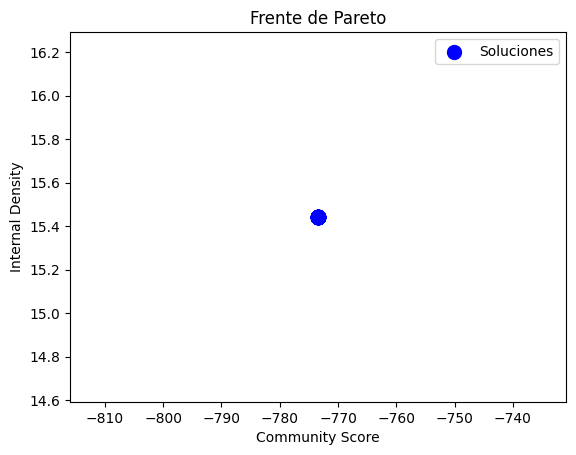

In [ ]:
plot_frente_pareto(fitness_pop)

In [ ]:
print(f"De 100 individuos que hay en la población, {len(pop_optimizada)} individuos están en el frente de pareto.")

De 100 individuos que hay en la población, 100 individuos están en el frente de pareto.


##### Con creación usando Leiden:

In [ ]:
pop_optimizada, fitness_pop = NSGA2_SinCrowding(G, fitness, mutaciones, cruces, creacionAleatoria=False, trace=50)

Hiper volumen de la población inicial: 238712.90387555546
Fitness iniciales. Community Score: -513.7586180582532, Internal density: 13.786117946541342

Generación 50, hipervolumen: 334833.85834655876
Fitness iniciales. Community Score: -625.9753273240165, Internal density: 14.123802858687531

Generación 100, hipervolumen: 342210.1806716095
Fitness iniciales. Community Score: -651.5753785163978, Internal density: 14.439802436739669

Generación 150, hipervolumen: 344124.8135365984
Fitness iniciales. Community Score: -696.9833161630771, Internal density: 15.48837487088262

Generación 200, hipervolumen: 345466.5502912262
Fitness iniciales. Community Score: -689.7835070243347, Internal density: 14.36477092924424

Generación 250, hipervolumen: 347417.77324418334
Fitness iniciales. Community Score: -678.4284076880613, Internal density: 13.368673150109709

Generación 300, hipervolumen: 354679.91043295525
Fitness iniciales. Community Score: -724.5427599382127, Internal density: 14.0675475471209

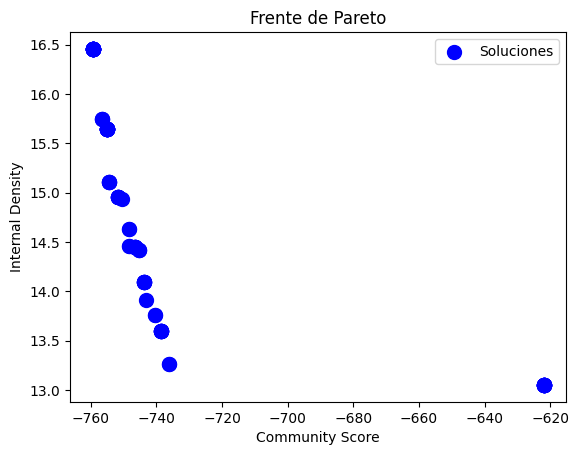

In [ ]:
plot_frente_pareto(fitness_pop)

In [ ]:
print(f"De 100 individuos que hay en la población, {len(pop_optimizada)} individuos están en el frente de pareto.")

De 100 individuos que hay en la población, 100 individuos están en el frente de pareto.


##### Con selección por rango:

In [ ]:
pop_optimizada, fitness_pop = NSGA2_SinCrowding(G, fitness, mutaciones, cruces, selTorneo=False, trace=50)

Hiper volumen de la población inicial: 284300.8128040429
Fitness iniciales. Community Score: -537.8231776408018, Internal density: 24.557059757897893

Generación 50, hipervolumen: 342040.82870265556
Fitness iniciales. Community Score: -688.6953826984329, Internal density: 17.80231750022666

Generación 100, hipervolumen: 353465.7646832947
Fitness iniciales. Community Score: -695.7693990848728, Internal density: 15.040126482597593

Generación 150, hipervolumen: 355294.5884778406
Fitness iniciales. Community Score: -711.553911509745, Internal density: 14.472913660789768

Generación 200, hipervolumen: 340362.5644594205
Fitness iniciales. Community Score: -706.9912939265283, Internal density: 13.711795305791618

Generación 250, hipervolumen: 337301.5473129783
Fitness iniciales. Community Score: -722.4724726449938, Internal density: 14.275330733628568

Generación 300, hipervolumen: 354680.4864341874
Fitness iniciales. Community Score: -730.3056805525448, Internal density: 13.549836027968901


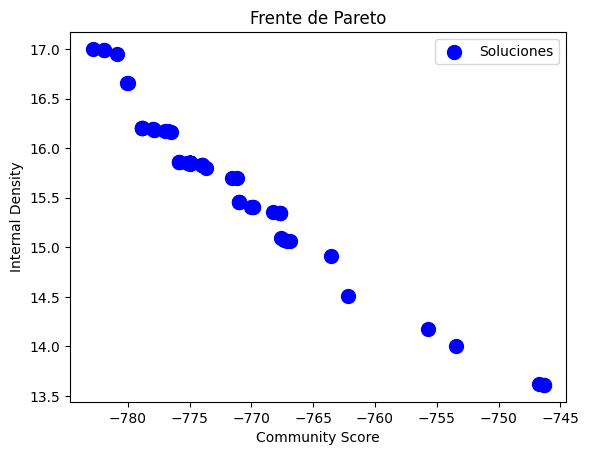

In [ ]:
plot_frente_pareto(fitness_pop)

In [ ]:
print(f"De 100 individuos que hay en la población, {len(pop_optimizada)} individuos están en el frente de pareto.")

De 100 individuos que hay en la población, 100 individuos están en el frente de pareto.


##### Con mayor probabilidad de mutación:

In [ ]:
pop_optimizada, fitness_pop = NSGA2_SinCrowding(G, fitness, mutaciones, cruces, pmut=0.5, trace=50)

Hiper volumen de la población inicial: 294156.2397985863
Fitness iniciales. Community Score: -545.5451575132444, Internal density: 24.60900063889277

Generación 50, hipervolumen: 347229.88459633675
Fitness iniciales. Community Score: -722.7131276435067, Internal density: 18.553856204601303

Generación 100, hipervolumen: 349763.55511565704
Fitness iniciales. Community Score: -721.2245239942619, Internal density: 17.446765903521374

Generación 150, hipervolumen: 334287.53615186294
Fitness iniciales. Community Score: -721.6197843488168, Internal density: 16.85633228440196

Generación 200, hipervolumen: 330540.28480324545
Fitness iniciales. Community Score: -721.4559621265945, Internal density: 16.842742793433164

Generación 250, hipervolumen: 337383.6578484918
Fitness iniciales. Community Score: -703.275128267426, Internal density: 16.277291740060544

Generación 300, hipervolumen: 327242.5446452304
Fitness iniciales. Community Score: -695.9592578714233, Internal density: 16.13953609238364

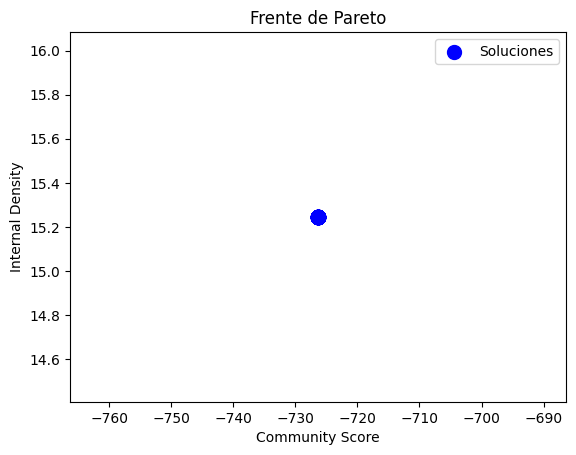

In [ ]:
plot_frente_pareto(fitness_pop)

In [ ]:
print(f"De 100 individuos que hay en la población, {len(pop_optimizada)} individuos están en el frente de pareto.")

De 100 individuos que hay en la población, 100 individuos están en el frente de pareto.


##### Menor mutación y más torneo:

In [ ]:
pop_optimizada, fitness_pop = NSGA2_SinCrowding(G, fitness, mutaciones, cruces, pmut=0.35, T=6, trace=50)

Hiper volumen de la población inicial: 307525.64485960075
Fitness iniciales. Community Score: -553.0260891413203, Internal density: 24.18010467679966

Generación 50, hipervolumen: 346198.1372241158
Fitness iniciales. Community Score: -697.6917986601346, Internal density: 16.55924014658836

Generación 100, hipervolumen: 347845.71906443144
Fitness iniciales. Community Score: -717.09482904004, Internal density: 16.48893829018323

Generación 150, hipervolumen: 352859.5718785524
Fitness iniciales. Community Score: -704.5280535801104, Internal density: 15.278538275860308

Generación 200, hipervolumen: 353424.58190530323
Fitness iniciales. Community Score: -713.256113101233, Internal density: 15.347039015316465

Generación 250, hipervolumen: 354187.4582118854
Fitness iniciales. Community Score: -709.4142198136785, Internal density: 14.726019543867675

Generación 300, hipervolumen: 351921.6350234946
Fitness iniciales. Community Score: -712.1517721038795, Internal density: 14.407376343883659

G

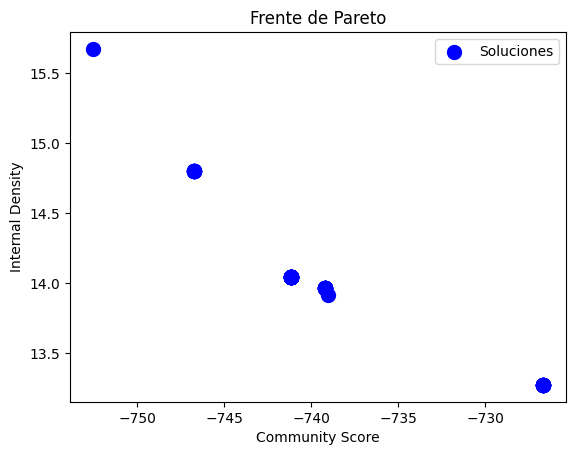

In [ ]:
plot_frente_pareto(fitness_pop)

In [ ]:
print(f"De 100 individuos que hay en la población, {len(pop_optimizada)} individuos están en el frente de pareto.")

De 100 individuos que hay en la población, 100 individuos están en el frente de pareto.


##### Con muchisima más exploración:

In [ ]:
pop_optimizada, fitness_pop = NSGA2_SinCrowding(G, fitness, mutaciones, cruces, pmut=0.80, trace=50)

Hiper volumen de la población inicial: 296311.46427848464
Fitness iniciales. Community Score: -548.7082363076894, Internal density: 24.44176986934937

Generación 50, hipervolumen: 319495.05374300247
Fitness iniciales. Community Score: -693.9781257980053, Internal density: 18.37511347404674

Generación 100, hipervolumen: 333537.15201696876
Fitness iniciales. Community Score: -714.4173835877548, Internal density: 16.852794780472657

Generación 150, hipervolumen: 331298.3023224022
Fitness iniciales. Community Score: -718.8665763359771, Internal density: 16.862730747148277

Generación 200, hipervolumen: 329044.8421982002
Fitness iniciales. Community Score: -717.8766430071026, Internal density: 16.64152657221229

Generación 250, hipervolumen: 329044.8421982002
Fitness iniciales. Community Score: -717.8766430071026, Internal density: 16.64152657221229

Generación 300, hipervolumen: 329044.8421982002
Fitness iniciales. Community Score: -717.8766430071026, Internal density: 16.64152657221229



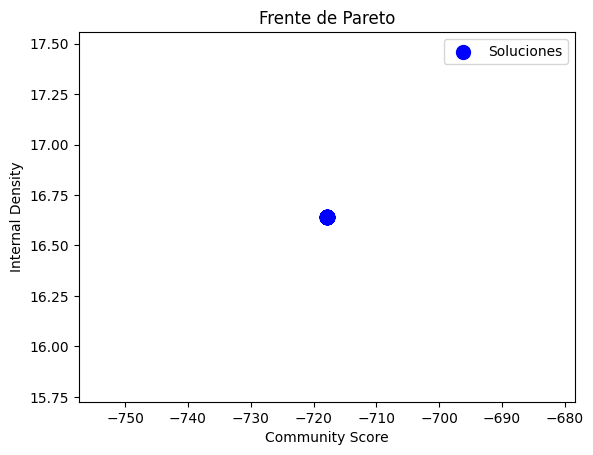

In [ ]:
plot_frente_pareto(fitness_pop)

In [ ]:
print(f"De 100 individuos que hay en la población, {len(pop_optimizada)} individuos están en el frente de pareto.")

De 100 individuos que hay en la población, 100 individuos están en el frente de pareto.


#### Ejecuciones NSGA2 (normal)

##### Con parámetros por defecto:

In [ ]:
pop_optimizada, fitness_pop = NSGA2(G, fitness, mutaciones, cruces, trace=50)

Hiper volumen de la población inicial: 300603.32151867374
Fitness iniciales. Community Score: -542.3849309334919, Internal density: 24.47061135085986

Generación 50, hipervolumen: 357193.81683141843
Fitness iniciales. Community Score: -717.7187904660135, Internal density: 17.42258514643091

Generación 100, hipervolumen: 366009.46154877567
Fitness iniciales. Community Score: -732.3641459810007, Internal density: 16.42183144641696

Generación 150, hipervolumen: 366829.2046020503
Fitness iniciales. Community Score: -730.1085684673095, Internal density: 16.078249550973236

Generación 200, hipervolumen: 369677.7812674939
Fitness iniciales. Community Score: -726.886305659024, Internal density: 15.309235645581548

Generación 250, hipervolumen: 370197.8608156286
Fitness iniciales. Community Score: -719.9713140472512, Internal density: 15.024092133295333

Generación 300, hipervolumen: 370200.73740753235
Fitness iniciales. Community Score: -719.795761278792, Internal density: 15.005465795036077


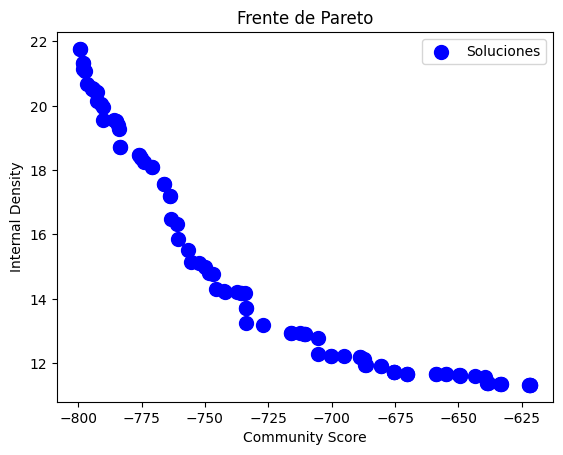

In [ ]:
plot_frente_pareto(fitness_pop)

In [ ]:
print(f"De 100 individuos que hay en la población, {len(pop_optimizada)} individuos están en el frente de pareto.")

De 100 individuos que hay en la población, 100 individuos están en el frente de pareto.


##### Con creación usando Leiden:

In [ ]:
pop_optimizada, fitness_pop = NSGA2(G, fitness, mutaciones, cruces, creacionAleatoria=False, trace=50)

Hiper volumen de la población inicial: 242401.53096657983
Fitness iniciales. Community Score: -490.68354957785954, Internal density: 13.753212773813962

Generación 50, hipervolumen: 332422.29194703215
Fitness iniciales. Community Score: -614.9911729658352, Internal density: 13.252284372036515

Generación 100, hipervolumen: 345395.9153759572
Fitness iniciales. Community Score: -667.1771736274178, Internal density: 13.522524403038046

Generación 150, hipervolumen: 354846.85955772805
Fitness iniciales. Community Score: -667.3390094829431, Internal density: 13.833446135410869

Generación 200, hipervolumen: 360116.4792861111
Fitness iniciales. Community Score: -669.7695864869569, Internal density: 13.159177344819836

Generación 250, hipervolumen: 361698.94745520136
Fitness iniciales. Community Score: -690.7930956517034, Internal density: 13.755192135994417

Generación 300, hipervolumen: 362016.99302930135
Fitness iniciales. Community Score: -697.3191974486481, Internal density: 13.899275716

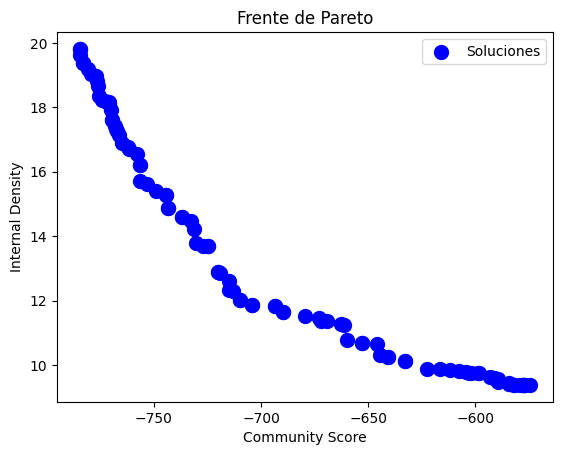

In [ ]:
plot_frente_pareto(fitness_pop)

In [ ]:
print(f"De 100 individuos que hay en la población, {len(pop_optimizada)} individuos están en el frente de pareto.")

De 100 individuos que hay en la población, 100 individuos están en el frente de pareto.


##### Con selección por rango:

In [ ]:
pop_optimizada, fitness_pop = NSGA2(G, fitness, mutaciones, cruces, selTorneo=False, trace=50)

Hiper volumen de la población inicial: 282408.1864368677
Fitness iniciales. Community Score: -537.8706219225676, Internal density: 24.85188881245325

Generación 50, hipervolumen: 340698.25809532753
Fitness iniciales. Community Score: -689.2446627673296, Internal density: 14.95558640054537

Generación 100, hipervolumen: 350237.80691783555
Fitness iniciales. Community Score: -689.7497830944137, Internal density: 14.441562617019926

Generación 150, hipervolumen: 354725.91791979875
Fitness iniciales. Community Score: -690.2424493158089, Internal density: 14.115081895187137

Generación 200, hipervolumen: 355736.0932824249
Fitness iniciales. Community Score: -695.279676304749, Internal density: 13.484809356529402

Generación 250, hipervolumen: 355759.71193945647
Fitness iniciales. Community Score: -693.6773791988236, Internal density: 13.357434854743596

Generación 300, hipervolumen: 355778.41707418824
Fitness iniciales. Community Score: -692.3788923875478, Internal density: 13.1562810731137

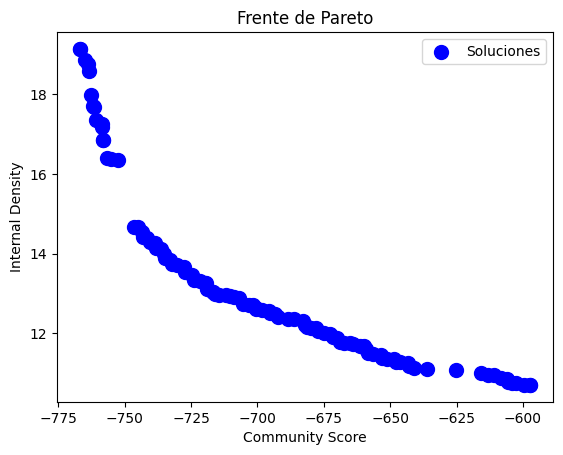

In [ ]:
plot_frente_pareto(fitness_pop)

In [ ]:
print(f"De 100 individuos que hay en la población, {len(pop_optimizada)} individuos están en el frente de pareto.")

De 100 individuos que hay en la población, 100 individuos están en el frente de pareto.


##### Con más mutación:

In [ ]:
pop_optimizada, fitness_pop = NSGA2(G, fitness, mutaciones, cruces, pmut=0.35, trace=50)

Hiper volumen de la población inicial: 303735.1013519218
Fitness iniciales. Community Score: -541.2795740617504, Internal density: 24.45014875706995

Generación 50, hipervolumen: 354133.39663799416
Fitness iniciales. Community Score: -747.4394765959498, Internal density: 17.234199211277133

Generación 100, hipervolumen: 355272.0830977483
Fitness iniciales. Community Score: -751.3721810882603, Internal density: 17.362953167655093

Generación 150, hipervolumen: 355654.3182092316
Fitness iniciales. Community Score: -746.1220371851887, Internal density: 17.32725802920969

Generación 200, hipervolumen: 356106.9475416971
Fitness iniciales. Community Score: -744.3334662348889, Internal density: 16.785814670191872

Generación 250, hipervolumen: 356107.6745986172
Fitness iniciales. Community Score: -743.865228335472, Internal density: 16.74077616784583

Generación 300, hipervolumen: 358004.2496650971
Fitness iniciales. Community Score: -734.5866200335581, Internal density: 16.1167472256575

Gen

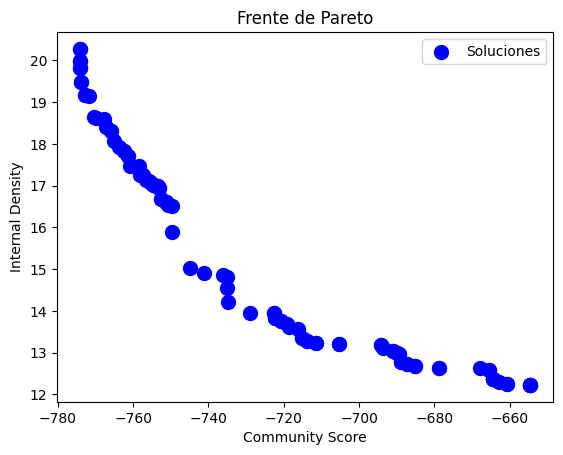

In [ ]:
plot_frente_pareto(fitness_pop)

In [ ]:
print(f"De 100 individuos que hay en la población, {len(pop_optimizada)} individuos están en el frente de pareto.")

De 100 individuos que hay en la población, 100 individuos están en el frente de pareto.


##### Con aún más mutación y con selección por rango:

In [ ]:
pop_optimizada, fitness_pop = NSGA2(G, fitness, mutaciones, cruces, pmut=0.60, selTorneo=False, trace=50)

Hiper volumen de la población inicial: 286547.6812940392
Fitness iniciales. Community Score: -545.3568579238744, Internal density: 24.349034909030216

Generación 50, hipervolumen: 346523.594312385
Fitness iniciales. Community Score: -738.5560788906097, Internal density: 15.994949198854412

Generación 100, hipervolumen: 347533.67104503117
Fitness iniciales. Community Score: -717.5346293276027, Internal density: 15.083680317828826

Generación 150, hipervolumen: 347533.67104503117
Fitness iniciales. Community Score: -717.1804974989104, Internal density: 15.072250819410725

Generación 200, hipervolumen: 347533.67104503117
Fitness iniciales. Community Score: -717.4753673892233, Internal density: 15.077266501214353

Generación 250, hipervolumen: 347533.67104503117
Fitness iniciales. Community Score: -717.4753673892233, Internal density: 15.077266501214353

Generación 300, hipervolumen: 347533.7665643027
Fitness iniciales. Community Score: -717.7727933865467, Internal density: 15.087137950585

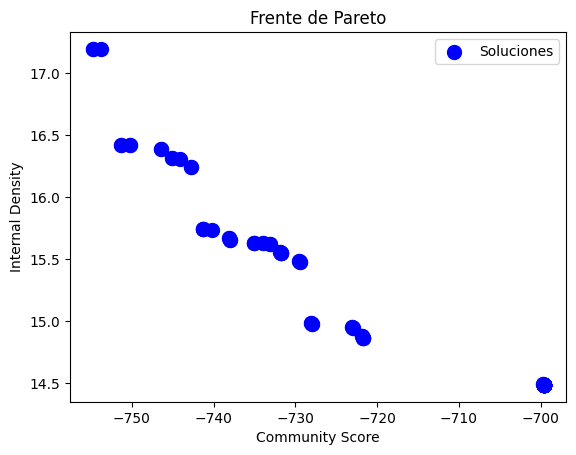

In [ ]:
plot_frente_pareto(fitness_pop)

In [ ]:
print(f"De 100 individuos que hay en la población, {len(pop_optimizada)} individuos están en el frente de pareto.")

De 100 individuos que hay en la población, 100 individuos están en el frente de pareto.


#### Ejecuciones SPEA ilimitado

##### Con los parámetros por defecto:

In [ ]:
pop_optimizada, fitness_pop = SPEA_Ilimitado(G, fitness, mutaciones, cruces, trace=50)

Hiper volumen de la población inicial: 284152.62728404754
Fitness iniciales. Community Score: -542.8365705400494, Internal density: 24.601978792432774

Generación 50, hipervolumen: 351220.78666789347
Fitness iniciales. Community Score: -711.9223717111435, Internal density: 18.551504505286715

Generación 100, hipervolumen: 371938.91933426325
Fitness iniciales. Community Score: -760.1867064271879, Internal density: 20.379338707515902

Generación 150, hipervolumen: 381673.21889831725
Fitness iniciales. Community Score: -770.0838144709663, Internal density: 21.346353945093504

Generación 200, hipervolumen: 335868.9650896657
Fitness iniciales. Community Score: -659.5194298642339, Internal density: 16.019074590262036

Generación 250, hipervolumen: 350571.44956679275
Fitness iniciales. Community Score: -703.5317958146304, Internal density: 16.350394130758577

Generación 300, hipervolumen: 370616.50473064056
Fitness iniciales. Community Score: -758.8770926912631, Internal density: 18.884465503

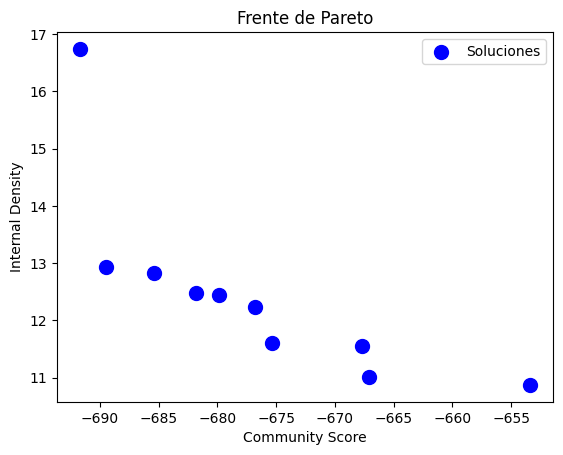

In [ ]:
plot_frente_pareto(fitness_pop)

In [ ]:
print(f"De 100 individuos que hay en la población, {len(pop_optimizada)} individuos están en el frente de pareto.")

De 100 individuos que hay en la población, 10 individuos están en el frente de pareto.


##### Con creación usando Leiden:

In [ ]:
pop_optimizada, fitness_pop = SPEA_Ilimitado(G, fitness, mutaciones, cruces, creacionAleatoria=False, trace=50)

Hiper volumen de la población inicial: 238774.69985943285
Fitness iniciales. Community Score: -501.8322149692363, Internal density: 13.709948277250906

Generación 50, hipervolumen: 351859.4460927136
Fitness iniciales. Community Score: -713.5096372272503, Internal density: 20.853678721498945

Generación 100, hipervolumen: 361617.16387318197
Fitness iniciales. Community Score: -728.0302027831669, Internal density: 20.909227511572443

Generación 150, hipervolumen: 353467.4842237193
Fitness iniciales. Community Score: -714.1844733839926, Internal density: 16.70214899612167

Generación 200, hipervolumen: 373838.9754123077
Fitness iniciales. Community Score: -757.6130396932521, Internal density: 18.65881107361885

Generación 250, hipervolumen: 380273.6845281748
Fitness iniciales. Community Score: -761.2649517644464, Internal density: 19.161210360154957

Generación 300, hipervolumen: 339422.43090269016
Fitness iniciales. Community Score: -681.5418039614549, Internal density: 15.21562576428247

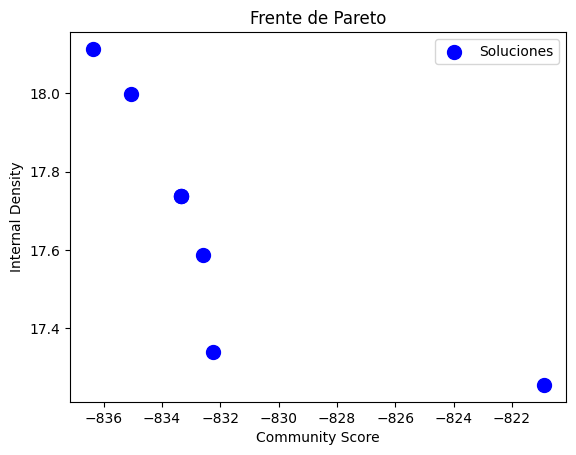

In [ ]:
plot_frente_pareto(fitness_pop)

In [ ]:
print(f"De 100 individuos que hay en la población, {len(pop_optimizada)} individuos están en el frente de pareto.")

De 100 individuos que hay en la población, 8 individuos están en el frente de pareto.


##### Con selección por rango:

In [ ]:
pop_optimizada, fitness_pop = SPEA_Ilimitado(G, fitness, mutaciones, cruces, selTorneo=False, trace=50)

Hiper volumen de la población inicial: 293026.60725360503
Fitness iniciales. Community Score: -546.1730676165555, Internal density: 24.705685958144763

Generación 50, hipervolumen: 199878.41856818416
Fitness iniciales. Community Score: -342.33823502200653, Internal density: 35.52218476505976

Generación 100, hipervolumen: 199936.47610632243
Fitness iniciales. Community Score: -332.06432268373436, Internal density: 37.48651771238015

Generación 150, hipervolumen: 192826.05899079127
Fitness iniciales. Community Score: -331.5104316298745, Internal density: 37.24722506766907

Generación 200, hipervolumen: 170526.57761145174
Fitness iniciales. Community Score: -311.9216502347001, Internal density: 37.959596166578265

Generación 250, hipervolumen: 183982.69704525292
Fitness iniciales. Community Score: -296.1564956028201, Internal density: 38.91852928812821

Generación 300, hipervolumen: 179420.74613422682
Fitness iniciales. Community Score: -297.4591184781194, Internal density: 37.9273399460

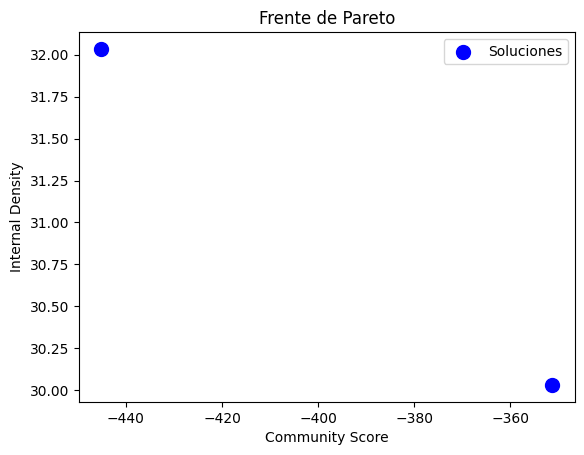

In [ ]:
plot_frente_pareto(fitness_pop)

In [ ]:
print(f"De 100 individuos que hay en la población, {len(pop_optimizada)} individuos están en el frente de pareto.")

De 100 individuos que hay en la población, 2 individuos están en el frente de pareto.


#### Tulipán

##### Con parámetros normales:

In [ ]:
pop_optimizada, fitness_pop = Tulipan(G, fitness, mutaciones, cruces, trace=50)

Hiper volumen de la población inicial: 287621.1907215551
Fitness iniciales. Community Score: -543.6814288386771, Internal density: 23.948428431911857

Generación 50, hipervolumen: 318808.38829698344
Fitness iniciales. Community Score: -645.9888258004203, Internal density: 15.219534942532457

Generación 100, hipervolumen: 349058.3489803935
Fitness iniciales. Community Score: -714.7472336338411, Internal density: 16.658466651172272

Generación 150, hipervolumen: 363278.9924084838
Fitness iniciales. Community Score: -718.3647393581111, Internal density: 17.60786767574167

Generación 200, hipervolumen: 373853.4970289783
Fitness iniciales. Community Score: -753.024947855746, Internal density: 20.725454457370933

Generación 250, hipervolumen: 376516.4750870735
Fitness iniciales. Community Score: -762.0443654110494, Internal density: 21.52696178086993

Generación 300, hipervolumen: 380885.48530871066
Fitness iniciales. Community Score: -767.3289940714645, Internal density: 22.353860929799517


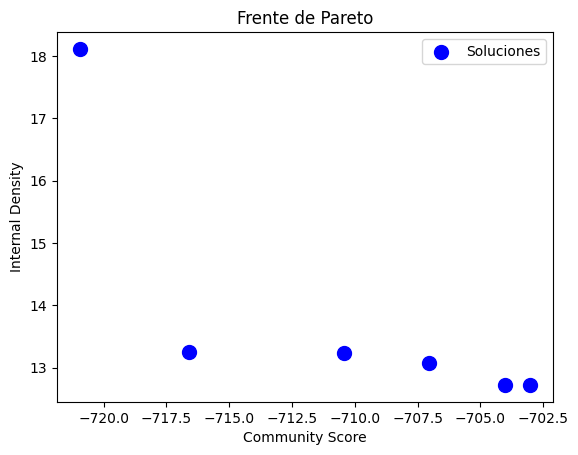

In [ ]:
plot_frente_pareto(fitness_pop)

In [ ]:
print(f"De 100 individuos que hay en la población, {len(pop_optimizada)} individuos están en el frente de pareto.")

De 100 individuos que hay en la población, 6 individuos están en el frente de pareto.


##### Con creación usando Leiden:

In [ ]:
pop_optimizada, fitness_pop = Tulipan(G, fitness, mutaciones, cruces, creacionAleatoria=False, trace=50)

Hiper volumen de la población inicial: 241554.21910111164
Fitness iniciales. Community Score: -501.8623274045113, Internal density: 13.743218653801407

Generación 50, hipervolumen: 341757.137103257
Fitness iniciales. Community Score: -681.5872416591268, Internal density: 18.249916221271775

Generación 100, hipervolumen: 363412.6639760128
Fitness iniciales. Community Score: -731.7145977514052, Internal density: 19.545621472837723

Generación 150, hipervolumen: 374484.63156050805
Fitness iniciales. Community Score: -764.4369104195724, Internal density: 21.487942447191784

Generación 200, hipervolumen: 376247.17703292
Fitness iniciales. Community Score: -759.455301414432, Internal density: 21.255477704442814

Generación 250, hipervolumen: 376741.3115490761
Fitness iniciales. Community Score: -756.9448001784367, Internal density: 20.511056574567295

Generación 300, hipervolumen: 368016.0270089413
Fitness iniciales. Community Score: -744.4790628040346, Internal density: 17.838002449105762



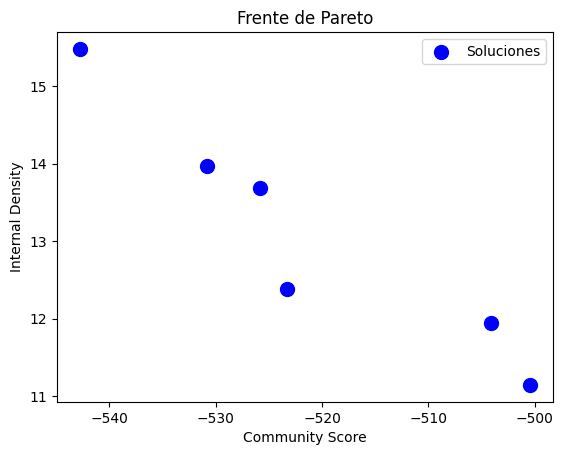

In [ ]:
plot_frente_pareto(fitness_pop)

In [ ]:
print(f"De 100 individuos que hay en la población, {len(pop_optimizada)} individuos están en el frente de pareto.")

De 100 individuos que hay en la población, 6 individuos están en el frente de pareto.


##### Con selección por rango:

In [ ]:
pop_optimizada, fitness_pop = Tulipan(G, fitness, mutaciones, cruces, selTorneo=False, trace=50)

Hiper volumen de la población inicial: 292207.8277169129
Fitness iniciales. Community Score: -541.9867629816541, Internal density: 24.555870521320426

Generación 50, hipervolumen: 215673.09668058675
Fitness iniciales. Community Score: -371.95030342629383, Internal density: 36.08682222932976

Generación 100, hipervolumen: 212183.4356109325
Fitness iniciales. Community Score: -338.76580477783637, Internal density: 37.17976343215784

Generación 150, hipervolumen: 185681.94213311278
Fitness iniciales. Community Score: -326.88801162242777, Internal density: 38.88574729476603

Generación 200, hipervolumen: 193503.5972429355
Fitness iniciales. Community Score: -323.44709823892276, Internal density: 38.568987034121854

Generación 250, hipervolumen: 188119.5203798053
Fitness iniciales. Community Score: -323.1547745770166, Internal density: 38.28411252570723

Generación 300, hipervolumen: 186849.15939272378
Fitness iniciales. Community Score: -323.0648436835303, Internal density: 38.757441615283

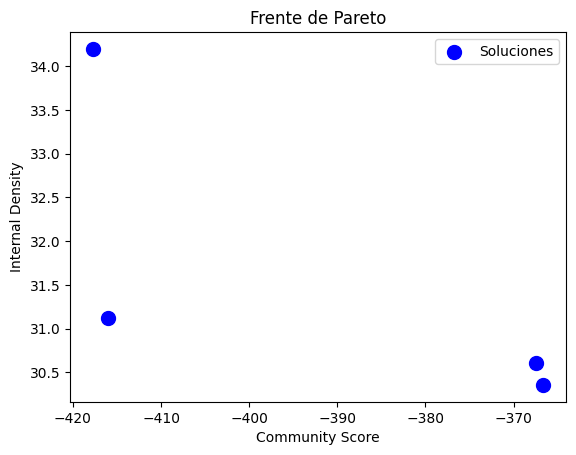

In [ ]:
plot_frente_pareto(fitness_pop)

In [ ]:
print(f"De 100 individuos que hay en la población, {len(pop_optimizada)} individuos están en el frente de pareto.")

De 100 individuos que hay en la población, 4 individuos están en el frente de pareto.


##### Con mayor mutación:

In [ ]:
pop_optimizada, fitness_pop = Tulipan(G, fitness, mutaciones, cruces, pmut=0.7, trace=50)

Hiper volumen de la población inicial: 282977.3325390904
Fitness iniciales. Community Score: -541.6051393940895, Internal density: 24.582031383966697

Generación 50, hipervolumen: 282997.16243107
Fitness iniciales. Community Score: -551.0136041735433, Internal density: 22.093735141362885

Generación 100, hipervolumen: 293827.7236801185
Fitness iniciales. Community Score: -536.4710790217352, Internal density: 21.70406323208308

Generación 150, hipervolumen: 281025.89140958036
Fitness iniciales. Community Score: -529.1734296388918, Internal density: 21.673528256628714

Generación 200, hipervolumen: 290115.35994014726
Fitness iniciales. Community Score: -537.6018125762971, Internal density: 21.251971610632076

Generación 250, hipervolumen: 282103.4725093653
Fitness iniciales. Community Score: -517.7981260237389, Internal density: 21.209869363618512

Generación 300, hipervolumen: 290960.15928473376
Fitness iniciales. Community Score: -508.84352584111764, Internal density: 21.7683779702132


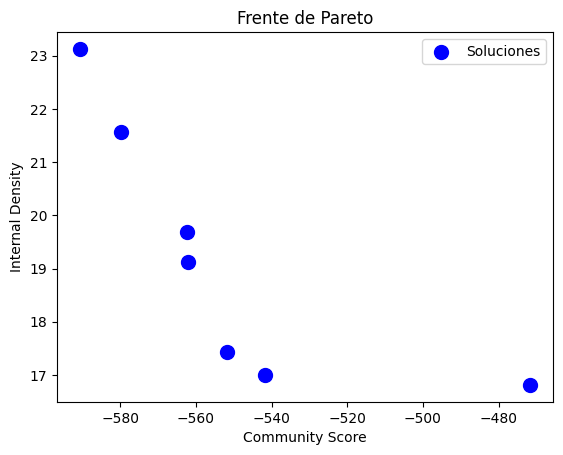

In [ ]:
plot_frente_pareto(fitness_pop)

In [ ]:
print(f"De 100 individuos que hay en la población, {len(pop_optimizada)} individuos están en el frente de pareto.")

De 100 individuos que hay en la población, 7 individuos están en el frente de pareto.


### Pruebas estadísticas

Mejores resultados iniciales:
* SPEA ilimitado con inicialización mediante Leiden.
* NSGA2 con inicialización mediante Leiden.
* NSGA2 con parámetros por defecto.

A continuación realizaremos unos estudios estadísticos para que la sombra de la aleatoriedad no ponga en duda la calidad de los resultados anteriormente obtenidos y para tener una mayor garantia de que los algoritmos funcionan correctamente.

In [ ]:
algoritmo1 = SPEA_Ilimitado #HV_medio 358226.0035018879
algoritmo2 = NSGA2 #HV_medio 364163.9534842474
algoritmo3 = NSGA2 #HV_medio 365659.6498490997
parametros1 = {"creacionAleatoria":False, "mutaciones":mutaciones, "cruces":cruces}
parametros2 = {"creacionAleatoria":False, "mutaciones":mutaciones, "cruces":cruces}
parametros3 = {"mutaciones":mutaciones, "cruces":cruces}

In [ ]:
get_stats(algoritmo1, G, fitness, parametros1, num_repeticiones=5, trace=50)

Repetición: 0.
Hiper volumen de la población inicial: 238486.39955373123
Fitness iniciales. Community Score: -513.9707308058938, Internal density: 13.901403888661584

Generación 50, hipervolumen: 335798.7458864237
Fitness iniciales. Community Score: -680.0771139083412, Internal density: 19.110367505286334

Generación 100, hipervolumen: 318842.6250294579
Fitness iniciales. Community Score: -582.6799825462189, Internal density: 14.882645247344685

Generación 150, hipervolumen: 325424.85670216946
Fitness iniciales. Community Score: -650.9533668437725, Internal density: 13.436934953479069

Generación 200, hipervolumen: 364536.2078094149
Fitness iniciales. Community Score: -741.6562863626043, Internal density: 17.65415808259003

Generación 250, hipervolumen: 336184.65551551647
Fitness iniciales. Community Score: -677.7181784170477, Internal density: 14.160127807084553

Generación 300, hipervolumen: 372560.73188334896
Fitness iniciales. Community Score: -749.3282506776574, Internal density: 

In [ ]:
get_stats(algoritmo2, G, fitness, parametros2, num_repeticiones=5, trace=50)

Repetición: 0.
Hiper volumen de la población inicial: 238712.90387555546
Fitness iniciales. Community Score: -514.2163462707039, Internal density: 13.815791094480382

Generación 50, hipervolumen: 342798.4827762447
Fitness iniciales. Community Score: -655.7078406095764, Internal density: 14.152727097935827

Generación 100, hipervolumen: 353853.0629590171
Fitness iniciales. Community Score: -697.1901750303533, Internal density: 15.675525295936495

Generación 150, hipervolumen: 358099.2673338503
Fitness iniciales. Community Score: -684.439511089749, Internal density: 14.477607795734796

Generación 200, hipervolumen: 363292.20602885634
Fitness iniciales. Community Score: -691.0761117347313, Internal density: 14.660971147781025

Generación 250, hipervolumen: 365660.2874933135
Fitness iniciales. Community Score: -699.88116708938, Internal density: 14.794958225811286

Generación 300, hipervolumen: 365669.2785434538
Fitness iniciales. Community Score: -699.7904890969771, Internal density: 14.7

In [ ]:
get_stats(algoritmo3, G, fitness, parametros3, num_repeticiones=5, trace=50)

Repetición: 0.
Hiper volumen de la población inicial: 288776.7036719867
Fitness iniciales. Community Score: -541.5105673674816, Internal density: 24.221129406583145

Generación 50, hipervolumen: 336858.36511452537
Fitness iniciales. Community Score: -633.6935528703258, Internal density: 15.652767241326243

Generación 100, hipervolumen: 347832.02252429305
Fitness iniciales. Community Score: -654.8175396326368, Internal density: 12.815129453692235

Generación 150, hipervolumen: 351402.88285594014
Fitness iniciales. Community Score: -662.7467744710964, Internal density: 12.684454616836378

Generación 200, hipervolumen: 353226.3592304643
Fitness iniciales. Community Score: -675.9387496376455, Internal density: 13.229427804175641

Generación 250, hipervolumen: 355120.8743823872
Fitness iniciales. Community Score: -683.8058493150893, Internal density: 13.641746934502237

Generación 300, hipervolumen: 355123.72277894366
Fitness iniciales. Community Score: -675.9196664424512, Internal density:

**Mejor resultado**: NSGA2 normal.

### Resultados

#### Salvado de los resultados

El mejor algoritmo según las estadísticas, ha sido NSGA con los parámetros por defecto. Por ese motivo, como solución final, se tomará un frente generado por el mismo.

In [ ]:
pop_optimizada, fitness_pop = NSGA2(G, fitness, mutaciones, cruces, trace=50)

Hiper volumen de la población inicial: 284199.551857656
Fitness iniciales. Community Score: -546.3305673779978, Internal density: 24.850419169973055

Generación 50, hipervolumen: 356834.5866818421
Fitness iniciales. Community Score: -703.0538457731856, Internal density: 19.077501033683376

Generación 100, hipervolumen: 366116.52853982267
Fitness iniciales. Community Score: -724.2851392281489, Internal density: 16.13446712028636

Generación 150, hipervolumen: 369993.1775140136
Fitness iniciales. Community Score: -745.6884490493976, Internal density: 15.012050407208667

Generación 200, hipervolumen: 372818.2012816225
Fitness iniciales. Community Score: -743.9407483670133, Internal density: 14.77529256898442

Generación 250, hipervolumen: 372828.9211997007
Fitness iniciales. Community Score: -736.3174973226814, Internal density: 14.365647069694017

Generación 300, hipervolumen: 372835.79095594445
Fitness iniciales. Community Score: -731.7684987725927, Internal density: 14.238029825173504


In [ ]:
pop_con_fitness = [(pop_optimizada[i], fitness_pop[i]) for i in range(len(pop_optimizada))]

# Guardado de la población y el fitness
with open('./drive/MyDrive/CosasSerias/Universidad/Master/mejor_pop_con_fitness.pkl', 'wb') as archivo:
    pickle.dump(pop_con_fitness, archivo)

## Ejercicio C – Análisis de las soluciones del Pareto

En esta sección se analizarán las soluciones del pareto devuelto a fin de compararlas con la solución original.

#### Carga de los resultados

In [ ]:
# Carga de la población
with open('./drive/MyDrive/CosasSerias/Universidad/Master/mejor_pop_con_fitness.pkl', 'rb') as archivo:
    pop_con_fitness = pickle.load(archivo)

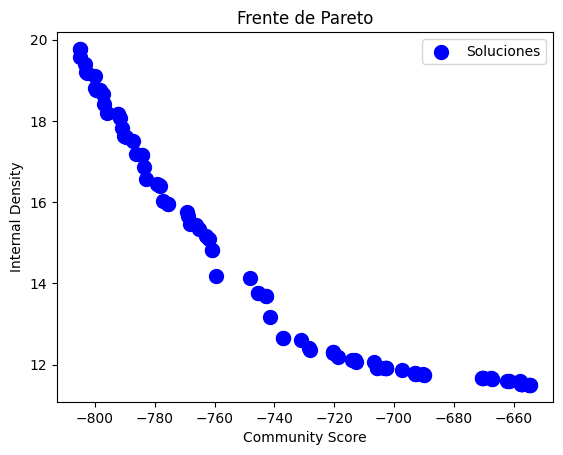

In [ ]:
fitness_pop = [ind[1] for ind in pop_con_fitness]
plot_frente_pareto(fitness_pop)

In [ ]:
print(f"Este frente tiene el sigueinte hipervolumen: {get_HV_score(G, [ind[1] for ind in pop_con_fitness])}")

Este frente tiene el sigueinte hipervolumen: 372839.7783251966


In [ ]:
print(fitness_pop)

[(-654.3447000326564, 11.497007197984539), (-654.3447000326564, 11.497007197984539), (-805.138595379624, 19.77464664906447), (-805.138595379624, 19.77464664906447), (-759.3511878191082, 14.189894266189915), (-741.5413265814636, 13.163368259730996), (-748.266180444599, 14.13275062762661), (-670.4553765795874, 11.673348481222373), (-689.8435889215453, 11.751804665560911), (-737.2727925742338, 12.658252623733006), (-730.9627133172853, 12.59917042463477), (-760.82008271826, 14.829381593367154), (-783.50118322774, 16.85919247703135), (-742.9055243652085, 13.688518899529766), (-697.1457431165566, 11.852584218064601), (-769.2762893067833, 15.764228529226548), (-782.7834675180248, 16.560531858689885), (-787.2573623218149, 17.512476119036798), (-777.2921161070899, 16.035076160841868), (-706.7864084741746, 12.063075911532762), (-727.99874880146, 12.368349892649439), (-796.9925109733665, 18.41044973621544), (-718.7324778104343, 12.191208556688942), (-800.1035478391079, 19.1064576387702), (-786.30

#### Estudio de los resultados

Comenzaremos analizando la relación entre las dos métricas del fitness y el número de comunidades, ya que dicho número es una de las primeras formas de comparar las comunidades.

In [ ]:
def plot_relacion(fitness, num_comunidades):
  fitness_ordenado = sorted(fitness, key=lambda x: num_comunidades[fitness.index(x)])
  com_ordenadas = sorted(num_comunidades)

  fig, axs = plt.subplots(2)
  fig.suptitle('Num comunidades en relación a cada fitness')

  axs[0].plot(com_ordenadas, [abs(f[0]) for f in fitness_ordenado])
  axs[0].set_ylabel("Community Score")
  axs[1].plot(com_ordenadas, [f[1] for f in fitness_ordenado])
  axs[1].set_ylabel("Internal Density")
  plt.show()

In [ ]:
num_comunidades = []
for ind in pop_con_fitness:
  comunidades = traduccion_locus(G, ind[0])
  num_comunidades.append(len(comunidades))
print(sorted(set(num_comunidades)))

[50, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67]


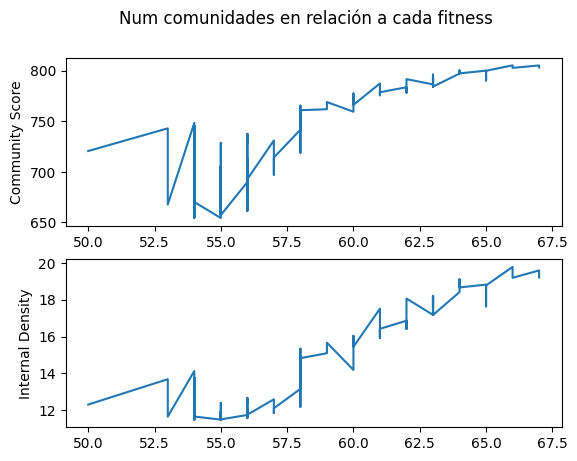

In [ ]:
plot_relacion(fitness_pop, num_comunidades)

Como se puede apreciar el menor número de comunidades que se da es 50 por lo que podemos afirmar que ninguna de las soluciones del pareto se acerca a las comunidades originales. Sin embargo, analizaremos más detenidamente algunas de las soluciones para comprobar con más certeza esta afirmación.

A continuación mostraremos por pantalla el individuo con el menor número de comunidades (50), con el mayor número (67), con un número de comunidades igual a la moda (55) y con un número de comunidades centrado más o menos entre todos los números de comunidades (58).

In [ ]:
moda = mode(num_comunidades)
media = mean(num_comunidades)
centro = 58
print(f"Moda: {moda}, centro: {centro}, media: {media}.")

Moda: 55, centro: 58, media: 57.94.


In [ ]:
ind_menor = pop_con_fitness[num_comunidades.index(min(num_comunidades))]
ind_mayor = pop_con_fitness[num_comunidades.index(max(num_comunidades))]
ind_moda = pop_con_fitness[num_comunidades.index(moda)]
ind_centro = pop_con_fitness[num_comunidades.index(centro)]

Comunidades menor:

In [ ]:
comunidades_menor = traduccion_locus(G, ind_menor[0])

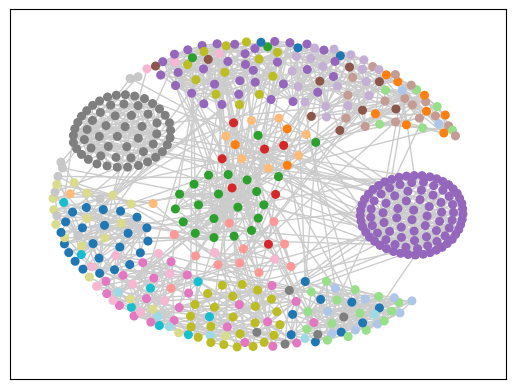

In [ ]:
draw_with_communities(G, comunidades_menor, with_labels=False)

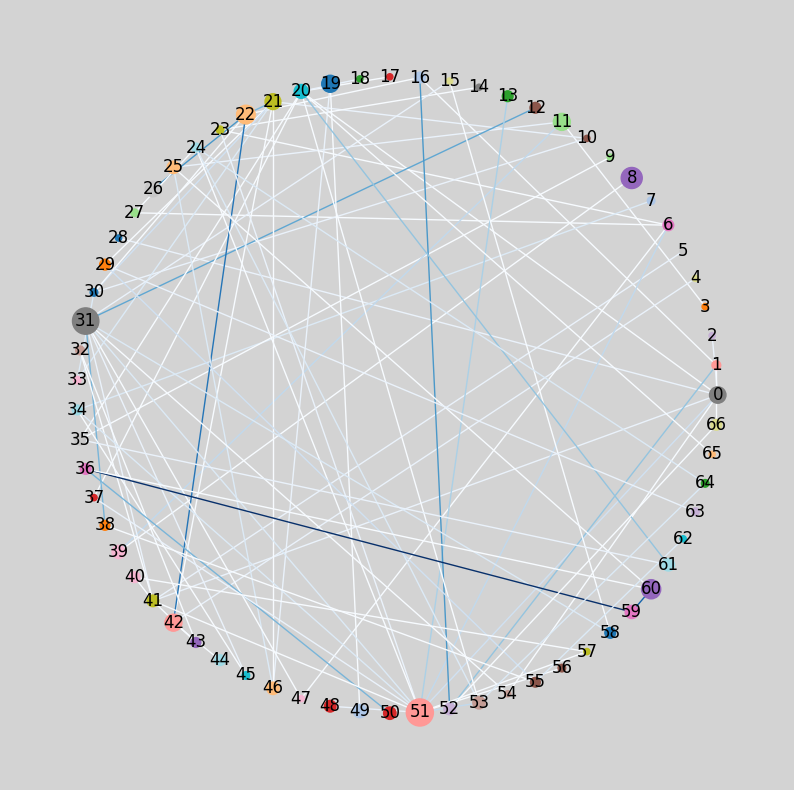

In [ ]:
draw_kamada(G)

In [ ]:
_, porcentaje_destinos = get_info_origenes(comunidades_menor, comunidades_originales)
print_info_destinos(porcentaje_destinos)

La comunidad original 0 se ha dispersado en las siguientes comunidades:
Un 65.71% en la comunidad 0
Un 5.71% en la comunidad 7
Un 2.86% en la comunidad 14
Un 25.71% en la comunidad 32

La comunidad original 1 se ha dispersado en las siguientes comunidades:
Un 45.24% en la comunidad 22
Un 21.43% en la comunidad 30
Un 33.33% en la comunidad 31

La comunidad original 2 se ha dispersado en las siguientes comunidades:
Un 37.50% en la comunidad 4
Un 62.50% en la comunidad 24

La comunidad original 3 se ha dispersado en las siguientes comunidades:
Un 25.00% en la comunidad 6
Un 25.00% en la comunidad 10
Un 12.50% en la comunidad 20
Un 25.00% en la comunidad 42
Un 12.50% en la comunidad 46

La comunidad original 4 se ha dispersado en las siguientes comunidades:
Un 0.92% en la comunidad 1
Un 0.61% en la comunidad 3
Un 0.92% en la comunidad 5
Un 1.22% en la comunidad 6
Un 0.61% en la comunidad 8
Un 4.89% en la comunidad 10
Un 0.92% en la comunidad 11
Un 0.61% en la comunidad 12
Un 1.83% en la co

Comunidades mayor

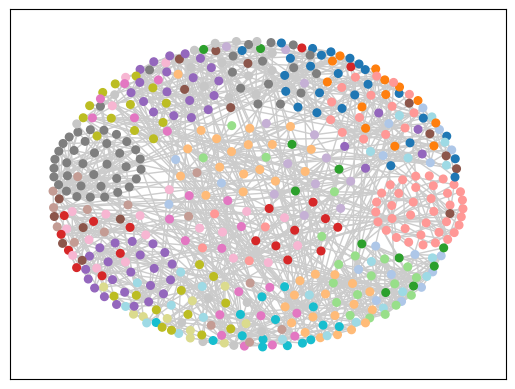

In [ ]:
comunidades_mayor = traduccion_locus(G, ind_mayor[0])
draw_with_communities(G, comunidades_mayor, with_labels=False)

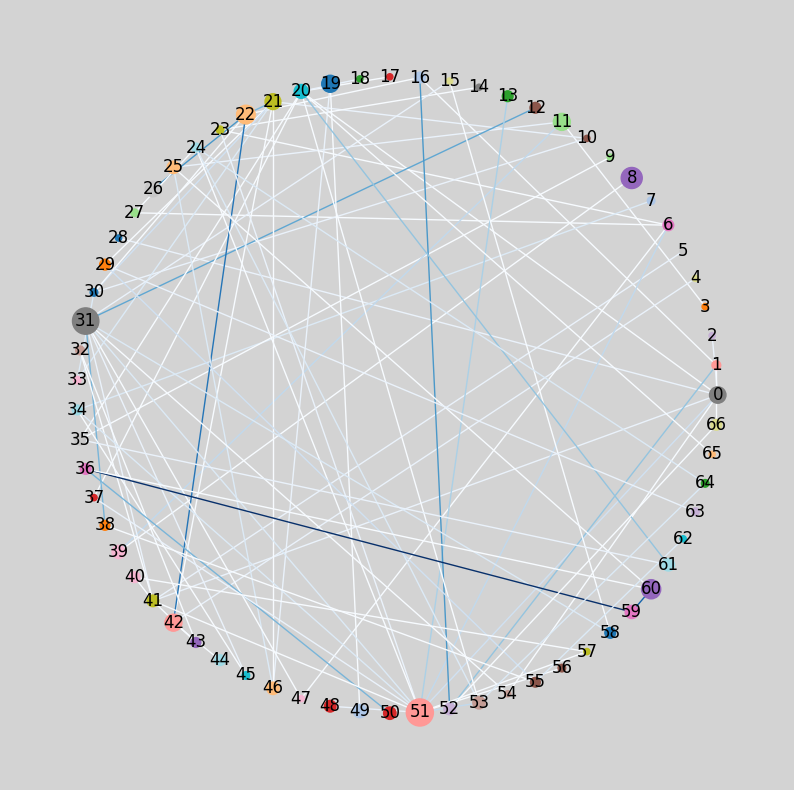

In [ ]:
draw_kamada(G)

In [ ]:
_, porcentaje_destinos = get_info_origenes(comunidades_mayor, comunidades_originales)
print_info_destinos(porcentaje_destinos)

La comunidad original 0 se ha dispersado en las siguientes comunidades:
Un 5.71% en la comunidad 8
Un 2.86% en la comunidad 17
Un 65.71% en la comunidad 28
Un 25.71% en la comunidad 43

La comunidad original 1 se ha dispersado en las siguientes comunidades:
Un 19.05% en la comunidad 22
Un 45.24% en la comunidad 29
Un 21.43% en la comunidad 40
Un 14.29% en la comunidad 41

La comunidad original 2 se ha dispersado en las siguientes comunidades:
Un 62.50% en la comunidad 1
Un 37.50% en la comunidad 4

La comunidad original 3 se ha dispersado en las siguientes comunidades:
Un 25.00% en la comunidad 6
Un 25.00% en la comunidad 12
Un 12.50% en la comunidad 25
Un 25.00% en la comunidad 54
Un 12.50% en la comunidad 58

La comunidad original 4 se ha dispersado en las siguientes comunidades:
Un 0.92% en la comunidad 0
Un 1.83% en la comunidad 2
Un 0.61% en la comunidad 3
Un 0.92% en la comunidad 5
Un 1.22% en la comunidad 6
Un 1.53% en la comunidad 7
Un 1.83% en la comunidad 9
Un 0.61% en la com

Comunidades moda:

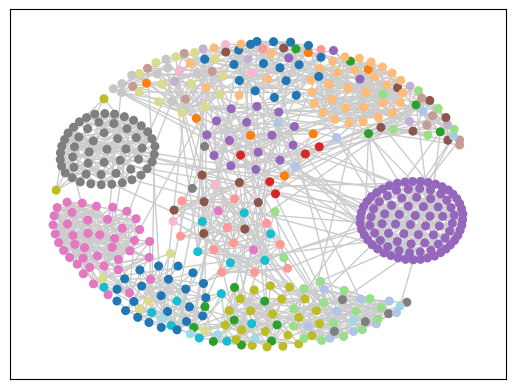

In [ ]:
comunidades_moda = traduccion_locus(G, ind_moda[0])
draw_with_communities(G, comunidades_moda, with_labels=False)

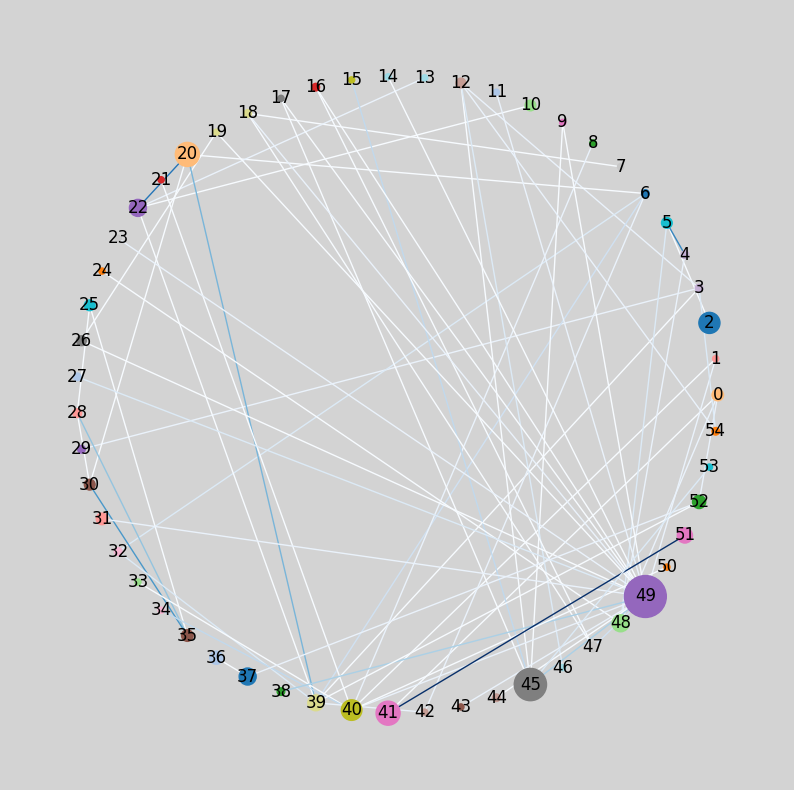

In [ ]:
draw_kamada(G)

In [ ]:
_, porcentaje_destinos = get_info_origenes(comunidades_moda, comunidades_originales)
print_info_destinos(porcentaje_destinos)

La comunidad original 0 se ha dispersado en las siguientes comunidades:
Un 65.71% en la comunidad 0
Un 5.71% en la comunidad 6
Un 2.86% en la comunidad 15
Un 8.57% en la comunidad 26
Un 17.14% en la comunidad 51

La comunidad original 1 se ha dispersado en las siguientes comunidades:
Un 71.43% en la comunidad 34
Un 28.57% en la comunidad 35

La comunidad original 2 se ha dispersado en las siguientes comunidades:
Un 62.50% en la comunidad 2
Un 37.50% en la comunidad 4

La comunidad original 3 se ha dispersado en las siguientes comunidades:
Un 25.00% en la comunidad 10
Un 12.50% en la comunidad 22
Un 25.00% en la comunidad 28
Un 25.00% en la comunidad 46
Un 12.50% en la comunidad 50

La comunidad original 4 se ha dispersado en las siguientes comunidades:
Un 0.92% en la comunidad 1
Un 0.61% en la comunidad 3
Un 0.92% en la comunidad 5
Un 0.92% en la comunidad 7
Un 0.61% en la comunidad 8
Un 8.56% en la comunidad 10
Un 0.92% en la comunidad 12
Un 0.61% en la comunidad 13
Un 1.83% en la com

Comunidades centro

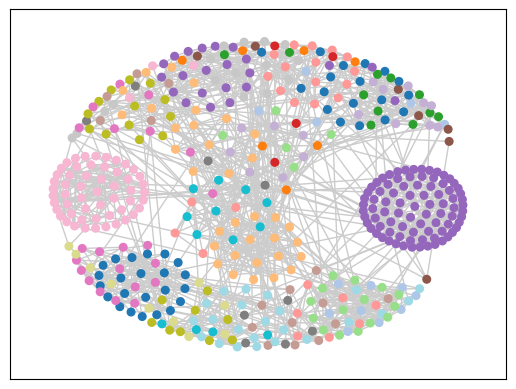

In [ ]:
comunidades_centro = traduccion_locus(G, ind_centro[0])
draw_with_communities(G, comunidades_centro, with_labels=False)

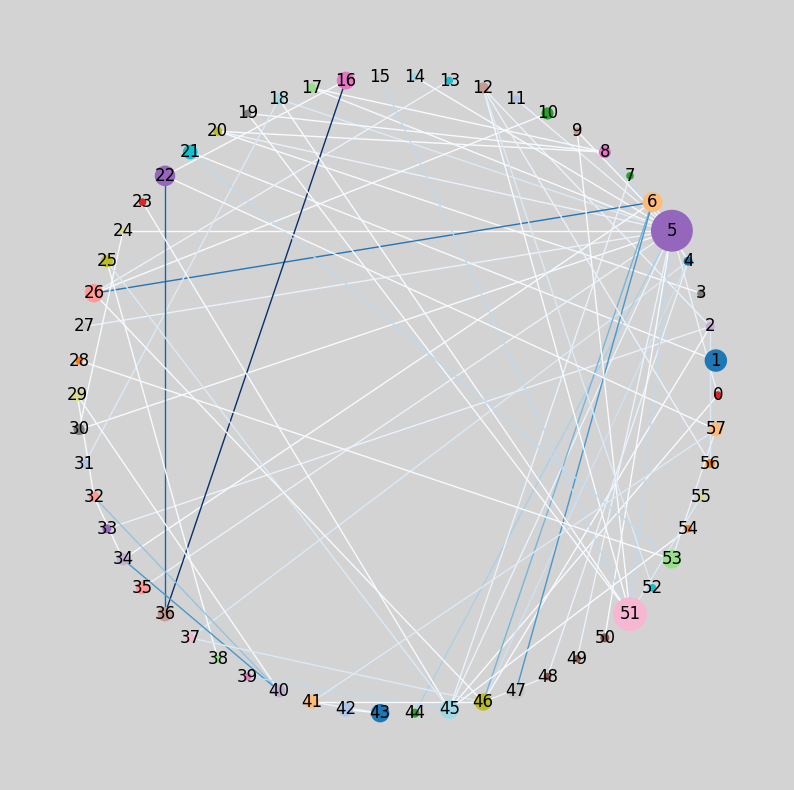

In [ ]:
draw_kamada(G)

In [ ]:
_, porcentaje_destinos = get_info_origenes(comunidades_moda, comunidades_originales)
print_info_destinos(porcentaje_destinos)

La comunidad original 0 se ha dispersado en las siguientes comunidades:
Un 65.71% en la comunidad 0
Un 5.71% en la comunidad 6
Un 2.86% en la comunidad 15
Un 8.57% en la comunidad 26
Un 17.14% en la comunidad 51

La comunidad original 1 se ha dispersado en las siguientes comunidades:
Un 71.43% en la comunidad 34
Un 28.57% en la comunidad 35

La comunidad original 2 se ha dispersado en las siguientes comunidades:
Un 62.50% en la comunidad 2
Un 37.50% en la comunidad 4

La comunidad original 3 se ha dispersado en las siguientes comunidades:
Un 25.00% en la comunidad 10
Un 12.50% en la comunidad 22
Un 25.00% en la comunidad 28
Un 25.00% en la comunidad 46
Un 12.50% en la comunidad 50

La comunidad original 4 se ha dispersado en las siguientes comunidades:
Un 0.92% en la comunidad 1
Un 0.61% en la comunidad 3
Un 0.92% en la comunidad 5
Un 0.92% en la comunidad 7
Un 0.61% en la comunidad 8
Un 8.56% en la comunidad 10
Un 0.92% en la comunidad 12
Un 0.61% en la comunidad 13
Un 1.83% en la com

### Conclusiones

Como se puede apreciar de los resultados anteriores, a pesar de que los paretos obtenidos han logrado unas buenas métricas, no se ha logrado generar ninguna solución parecida a la original. Todas las soluciones del pareto analizado presentan un número excesivo de comunidades.

Además, no parece haber ninguna relación lógica entre las comunidades originales y las generadas que pudiese justificar que, a pesar de la fragmentación observada en las soluciones, estas representan a las comunidades originales pero con un "grano más fino".

